**CONJUNTO DE DATOS DEL PROCESO PARA CONTROLAR LA DOSIFICACIÓN DE RESINA IMPREGNADA EN PAPEL EN PLANTA IMPREGNACIÓN DE PAPEL**

El proposito principal de este dataset es predecir el valor del GAP entre dos rodillos encargados de controlar la dosificación de resina en un papel. Este dataset existen dos variables objectivo del estudio, uno es GAP LO(mm) y otro es GAP LC(mm).



In [1]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.9 MB/s eta 0:00:00


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                                                                      #libreria para generación de graficos en 2D
import mglearn as mg
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split                                                                 #libreria para dividir conjunto de datos en train y test.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score                                                    #libreria para usar matriz de confusión, calcular la presición, recall y exactitud.
from sklearn.linear_model import Lasso
import seaborn as sns
from scipy import stats
from matplotlib.patheffects import withStroke
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

**ETAPA 1: ENTENDIMIENTO DE LOS DATOS**

**LEEMOS EL DATASET QUE CONTIENE LOS DATOS DEL PROCESO DE LA IMPREGNADORA DE PAPEL.**

In [3]:
proyecto=pd.read_csv('https://raw.githubusercontent.com/aristidesuao/proyectoAP/main/proyectoAP.csv',delimiter=';') #archivo csv que los datos del proceso gap de la impregnadora de papel.

df=pd.DataFrame(proyecto) #se crea dataframe



el archivo CSV está en  un repositorio de github.

In [4]:
df.head() #se muestra el dataframe

DISENO  Gramaje  PLANTA GAP LO(mm) GAP LT(mm)   TEMPERATURA HORNO 1(C)  \
0   Nuez        60    FF1       0,09      0,087                      126   
1   Nuez        60    FF1       0,09      0,087                      126   
2   Nuez        60    BP1       0,09      0,087                      130   
3   Nuez        60    BP1       0,09      0,087                      130   
4   Nuez        60    BP1       0,09      0,087                      130   

    TEMPERATURA HORNO 2(C)   TEMPERATURA HORNO 3(C)   TEMPERATURA HORNO 4(C)  \
0                      126                      126                      217   
1                      126                      126                      217   
2                      130                      130                      214   
3                      130                      130                      214   
4                      130                      130                      214   

    TEMPERATURA HORNO 5(C)  ...  PESO IMPREGNADO LO1  PESO IMPREGNADO LC  \
0                      220  ...                154,6               155,3   
1                      220  ...                154,6               155,3   
2                      220  ...                153,7               154,2   
3                      220  ...                156,6               153,7   
4                      220  ...                148,9               148,9   

   PESO IMPREGNADO LT1  VOLATILES LO2  VOLATILES LC2   VOLATILES LT2  FLUIDEZ  \
0                155,6            5,7            4,9             5,6      4,1   
1                155,6            5,7            4,9             5,6      4,1   
2                151,8            6,2            5,8             6,1        5   
3                  154            5,7            5,2             5,8        5   
4                147,6            5,6              5             5,7      4,1   

   ESTADO B LO3 ESTADO B LC3 ESTADO B LT3  
0            36         59,1         42,5  
1            36         59,1         42,5  
2          22,6         38,8         30,4  
3          24,7         44,1         29,4  
4          20,9           37         21,5  

[5 rows x 28 columns]

In [5]:
print("El número de registros es: ", df.shape[0])
print("El número de atributos es: ", df.shape[1])

El número de registros es:  172
El número de atributos es:  28


El dataset contiene en total 172 registro y 28 columnas.

In [6]:
df.columns

Index(['DISENO', 'Gramaje ', 'PLANTA', 'GAP LO(mm)', 'GAP LT(mm)',
       ' TEMPERATURA HORNO 1(C)', ' TEMPERATURA HORNO 2(C)',
       ' TEMPERATURA HORNO 3(C)', ' TEMPERATURA HORNO 4(C)',
       ' TEMPERATURA HORNO 5(C)', ' TEMPERATURA HORNO 6(C)',
       'VELOCIDAD VENTILADOR HORNO 1(rpm)',
       'VELOCIDAD VENTILADOR HORNO 2(rpm)',
       'VELOCIDAD VENTILADOR HORNO 3(rpm)',
       'VELOCIDAD VENTILADOR HORNO 4 (rpm)',
       'VELOCIDAD VENTILADOR HORNO 5 (rpm)',
       'VELOCIDAD VENTILADOR HORNO 6 (rpm)', ' VELOCIDAD DE LA LINEA m/min',
       'PESO IMPREGNADO LO1', 'PESO IMPREGNADO LC', 'PESO IMPREGNADO LT1',
       'VOLATILES LO2', 'VOLATILES LC2', ' VOLATILES LT2', 'FLUIDEZ',
       'ESTADO B LO3', 'ESTADO B LC3', 'ESTADO B LT3'],
      dtype='object')

**Descripción de cada target**

1. GAP LO(mm): separación en milimetros del lado del operacio entre los dos rodillos encargados de controlar la dosificación de resina en el papel. Este variable es un target. es una variable tipo numerica float.

2. GAP LC(mm): separación en milimetros del lado contrario del operacio entre los dos rodillos encargados de controlar la dosificación de resina en el papel. Este variable es un target. es una variable tipo numerica float.

**Descripción de cada caracteristica:**

1. DISEÑO:es el tipo de papel a impregnar. Es una variable categorica.

2. Gramaje:peso por metro cuadrado del papel. Es una variable tipo numerica entero.

3. PLANTA:es la planta laminadora de papel para el cual se fabrica el papel impregnado. Es una variable categorica

4. TEMPERATURA HORNO DEL 1: Es la temperatura del horno numero uno de la planta de impregnación. Está en grados celsius. Es una variable tipo numerica float.

5. TEMPERATURA HORNO DEL 2: Es la temperatura del horno numero dos de la planta de impregnación. Está en grados celsius. Es una variable tipo numerica float.

6. TEMPERATURA HORNO DEL 3: Es la temperatura del horno numero tres de la planta de impregnación. Está en grados celsius. Es una variable tipo numerica float.

7. TEMPERATURA HORNO DEL 4: Es la temperatura del horno numero cuatro de la planta de impregnación. Está en grados celsius. Es una variable tipo numerica float.

8. TEMPERATURA HORNO DEL 5: Es la temperatura del horno numero cinco de la planta de impregnación. Está en grados celsius. Es una variable tipo numerica float.

9. TEMPERATURA HORNO DEL 6: Es la temperatura del horno numero 6 de la planta de impregnación. Está en grados celsius. Es una variable tipo numerica float.

10. VELOCIDAD VENTILADOR HORNO del 1: es la velocidad del ventilador del horno numero uno donde se seca la resina impregnada en el papel. Está en rpm. Es una variable tipo numerica float.

11. VELOCIDAD VENTILADOR HORNO del 2: es la velocidad del ventilador del horno numero dos donde se seca la resina impregnada en el papel. Está en rpm. Es una variable tipo numerica float.

12. VELOCIDAD VENTILADOR HORNO del 3: es la velocidad del ventilador del horno numero tres donde se seca la resina impregnada en el papel. Está en rpm. Es una variable tipo numerica float.

13. VELOCIDAD VENTILADOR HORNO del 4: es la velocidad del ventilador del horno numero cuatro donde se seca la resina impregnada en el papel. Está en rpm. Es una variable tipo numerica float.

14. VELOCIDAD VENTILADOR HORNO del 5: es la velocidad del ventilador del horno numero cinco donde se seca la resina impregnada en el papel. Está en rpm. Es una variable tipo numerica float.

15. VELOCIDAD VENTILADOR HORNO del 6: es la velocidad del ventilador del horno numero seis donde se seca la resina impregnada en el papel. Está en rpm. Es una variable tipo numerica float.

16. VELOCIDAD DE LA LINEA es la velocidad de los rodillos que generan la tension necesaria para que el papel se transporte desde la desbobinadora hasta la estación de corte de papel. Es una variable tipo numerica float.

17. PESO IMPREGNADO LO1(lado operación): es la suma del papel base, la resina, los aditivos y la humedad del papel. Es la muestra tomada del lado izquierdo del papel seco. Es una variable tipo numerica float.

18. PESO IMPREGNADO LC(lado centro de operación): es la suma del papel base, la resina, los aditivos y la humedad del papel. Es la muestra tomada en todo el centro del papel seco. Es una variable tipo numerica float.

18. PESO IMPREGNADO LT1(lado contrario de operación): es la suma del papel base, la resina, los aditivos y la humedad del papel. Es la muestra tomada del lado derecho del papel seco. Es una variable tipo numerica float.

19. VOLATILES LO2(lado operación): Los volátiles es la cantidad de agua que le queda al papel luego de tomar una muestra del lado izquierdo del papel seco y llevarla a 160° C durante 5 min. Es una variable tipo numerica float.

20. VOLATILES LC2(lado centro de operación): Los volátiles es la cantidad de agua que le queda al papel luego de tomar una muestra del centro del papel seco y llevarla a 160° C durante 5 min. Es una variable tipo numerica float.

21. VOLATILES LT2(lado contario de operación): Los volátiles es la cantidad de agua que le queda al papel luego de tomar una muestra del lado derecho  del papel seco y llevarla a 160° C durante 5 min. Es una variable tipo numerica float.

22. FLUIDEZ:  es una  prueba que muestra si el papel fluye dentro de las plantas de laminacion. Es una variable tipo numerica float.

22. ESTADO B LO3(lado operación): Es un análisis que se hace para determinar el grado de curado de una muestra que se toma del lado izquierdo del papel seco. Es una variable tipo numerica float.

23. ESTADO B LC3(lado centro operación): Es un análisis que se hace para determinar el grado de curado de una muestra que se toma del lado centro del papel seco. Es una variable tipo numerica float.

24. ESTADO B LT3(lado contrario operación): Es un análisis que se hace para determinar el grado de curado de una muestra que se toma del lado derecho del papel seco. Es una variable tipo numerica float.

**RENOMBRAMOS ALGUNAS COLUMNAS**

In [7]:
df=df.rename(columns={'Gramaje ':'Gramaje',' TEMPERATURA HORNO 1(C)':'Temp Horno 1',' TEMPERATURA HORNO 2(C)':'Temp Horno 2',' TEMPERATURA HORNO 3(C)':'Temp Horno 3'
                      ,' TEMPERATURA HORNO 4(C)':'Temp Horno 4',' TEMPERATURA HORNO 5(C)':'Temp Horno 5',' TEMPERATURA HORNO 6(C)':'Temp Horno 6',
                      'VELOCIDAD VENTILADOR HORNO 1(rpm)':'Vel Vent Horno 1','VELOCIDAD VENTILADOR HORNO 2(rpm)':'Vel Vent Horno 2','VELOCIDAD VENTILADOR HORNO 3(rpm)':'Vel Vent Horno 3',
                      'VELOCIDAD VENTILADOR HORNO 4 (rpm)':'Vel Vent Horno 4','VELOCIDAD VENTILADOR HORNO 5 (rpm)':'Vel Vent Horno 5','VELOCIDAD VENTILADOR HORNO 6 (rpm)':'Vel Vent Horno 6'
                       ,' VELOCIDAD DE LA LINEA m/min':'Vel Linea',' VOLATILES LT2':'VOLATILES LT2'})

In [8]:
df.columns

Index(['DISENO', 'Gramaje', 'PLANTA', 'GAP LO(mm)', 'GAP LT(mm)',
       'Temp Horno 1', 'Temp Horno 2', 'Temp Horno 3', 'Temp Horno 4',
       'Temp Horno 5', 'Temp Horno 6', 'Vel Vent Horno 1', 'Vel Vent Horno 2',
       'Vel Vent Horno 3', 'Vel Vent Horno 4', 'Vel Vent Horno 5',
       'Vel Vent Horno 6', 'Vel Linea', 'PESO IMPREGNADO LO1',
       'PESO IMPREGNADO LC', 'PESO IMPREGNADO LT1', 'VOLATILES LO2',
       'VOLATILES LC2', 'VOLATILES LT2', 'FLUIDEZ', 'ESTADO B LO3',
       'ESTADO B LC3', 'ESTADO B LT3'],
      dtype='object')

con el método info podemos buscar valores nulos en alguna de las variables del dataset:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DISENO               172 non-null    object
 1   Gramaje              172 non-null    int64 
 2   PLANTA               172 non-null    object
 3   GAP LO(mm)           172 non-null    object
 4   GAP LT(mm)           172 non-null    object
 5   Temp Horno 1         172 non-null    int64 
 6   Temp Horno 2         172 non-null    int64 
 7   Temp Horno 3         172 non-null    int64 
 8   Temp Horno 4         172 non-null    int64 
 9   Temp Horno 5         172 non-null    int64 
 10  Temp Horno 6         172 non-null    int64 
 11  Vel Vent Horno 1     172 non-null    int64 
 12  Vel Vent Horno 2     172 non-null    int64 
 13  Vel Vent Horno 3     172 non-null    int64 
 14  Vel Vent Horno 4     172 non-null    int64 
 15  Vel Vent Horno 5     172 non-null    int64 
 16  Vel Vent

Teniendo en cuenta que el dataset contiene 172 registros se puede notar que las ultimas 3 variables hay solo 171, lo que quiere decir que existe un valor nulo en cada una de estas variables. Además, también se puede observar que las variablres 3,4,18,19,20,21,22,23,24,25,26,27 son tipo object, cuando realmente deberian ser tipo numerica. Esto es indicio de que existe bien un valor nulo o un valor no numerico.

Se procede a convertir las columnas anteriormente mencionadas a valor float.

In [10]:
try:
  df=df.astype({'GAP LO(mm)':'float64','GAP LT(mm)':'float64','PESO IMPREGNADO LO1':'float64',
                'PESO IMPREGNADO LC':'float64','PESO IMPREGNADO LT1':'float64','VOLATILES LO2':'float64',
                'VOLATILES LC2':'float64','VOLATILES LT2':'float64','FLUIDEZ':'float64','ESTADO B LO3':'float64',
                'ESTADO B LC3':'float64','ESTADO B LT3':'float64'})
except ValueError as e:
    print(e)

could not convert string to float: '0,09'


El error anterior se debe a que el decimal de los registros de estas variables están separadas por comas y no por puntos.

In [11]:
df=df.replace(",",".",regex=True) # se reemplaza cada coma por punto en los registro del dataset.

Se procede a convertir las columnas anteriormente mencionadas a valor float.

In [12]:
try:
  df=df.astype({'GAP LO(mm)':'float64','GAP LT(mm)':'float64','PESO IMPREGNADO LO1':'float64',
                'PESO IMPREGNADO LC':'float64','PESO IMPREGNADO LT1':'float64','VOLATILES LO2':'float64',
                'VOLATILES LC2':'float64','VOLATILES LT2':'float64','FLUIDEZ':'float64','ESTADO B LO3':'float64',
                'ESTADO B LC3':'float64','ESTADO B LT3':'float64'})
except ValueError as e:
    print(e)

could not convert string to float: '-'


El error anterior se debe a que un registro de las variables anteriores contiene el caracter "-". Es por esto que las variables son tipo object y no numerica. Se procede a reemplazar el caracter "-" por la moda de cada variable.

In [13]:
columns=['GAP LO(mm)','GAP LT(mm)','PESO IMPREGNADO LO1',
                'PESO IMPREGNADO LC','PESO IMPREGNADO LT1','VOLATILES LO2',
                'VOLATILES LC2','VOLATILES LT2','FLUIDEZ','ESTADO B LO3',
                'ESTADO B LC3','ESTADO B LT3']

for i in range(0,len(columns)):
   df[columns[i]]=df[columns[i]].replace("-",df[columns[i]].mode()[0],regex=True)

Se procede a convertir las columnas anteriormente mencionadas a valor float.

In [14]:
try:
  df=df.astype({'GAP LO(mm)':'float64','GAP LT(mm)':'float64','PESO IMPREGNADO LO1':'float64',
                'PESO IMPREGNADO LC':'float64','PESO IMPREGNADO LT1':'float64','VOLATILES LO2':'float64',
                'VOLATILES LC2':'float64','VOLATILES LT2':'float64','FLUIDEZ':'float64','ESTADO B LO3':'float64',
                'ESTADO B LC3':'float64','ESTADO B LT3':'float64'})
except ValueError as e:
    print(e)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DISENO               172 non-null    object 
 1   Gramaje              172 non-null    int64  
 2   PLANTA               172 non-null    object 
 3   GAP LO(mm)           172 non-null    float64
 4   GAP LT(mm)           172 non-null    float64
 5   Temp Horno 1         172 non-null    int64  
 6   Temp Horno 2         172 non-null    int64  
 7   Temp Horno 3         172 non-null    int64  
 8   Temp Horno 4         172 non-null    int64  
 9   Temp Horno 5         172 non-null    int64  
 10  Temp Horno 6         172 non-null    int64  
 11  Vel Vent Horno 1     172 non-null    int64  
 12  Vel Vent Horno 2     172 non-null    int64  
 13  Vel Vent Horno 3     172 non-null    int64  
 14  Vel Vent Horno 4     172 non-null    int64  
 15  Vel Vent Horno 5     172 non-null    int

Se observa que todavía las variables del 25 al 27 tiene 171 registros, cuando debería ser 172.

Verificamos que existan datos nulos

In [16]:
max(df.isnull().sum(axis=1))

3

Existen tres datos nulos en el datos. Se necesita saber en que variables están esos datos nulos.

In [17]:
df.isnull().sum()

DISENO                 0
Gramaje                0
PLANTA                 0
GAP LO(mm)             0
GAP LT(mm)             0
Temp Horno 1           0
Temp Horno 2           0
Temp Horno 3           0
Temp Horno 4           0
Temp Horno 5           0
Temp Horno 6           0
Vel Vent Horno 1       0
Vel Vent Horno 2       0
Vel Vent Horno 3       0
Vel Vent Horno 4       0
Vel Vent Horno 5       0
Vel Vent Horno 6       0
Vel Linea              0
PESO IMPREGNADO LO1    0
PESO IMPREGNADO LC     0
PESO IMPREGNADO LT1    0
VOLATILES LO2          0
VOLATILES LC2          0
VOLATILES LT2          0
FLUIDEZ                0
ESTADO B LO3           1
ESTADO B LC3           1
ESTADO B LT3           1
dtype: int64

Las caracteristicas 'ESTADO B LO3', ESTADO B LC3 y ESTADO B LT3 contiene los datos nulos.

Se reemplaza los datos nulos por la moda de cada caracteristica.

In [18]:
subset_cols=['ESTADO B LO3','ESTADO B LC3','ESTADO B LT3']
[df[col].fillna(df[col].mode().values[0], inplace=True) for col in subset_cols]
df.isnull().sum()

DISENO                 0
Gramaje                0
PLANTA                 0
GAP LO(mm)             0
GAP LT(mm)             0
Temp Horno 1           0
Temp Horno 2           0
Temp Horno 3           0
Temp Horno 4           0
Temp Horno 5           0
Temp Horno 6           0
Vel Vent Horno 1       0
Vel Vent Horno 2       0
Vel Vent Horno 3       0
Vel Vent Horno 4       0
Vel Vent Horno 5       0
Vel Vent Horno 6       0
Vel Linea              0
PESO IMPREGNADO LO1    0
PESO IMPREGNADO LC     0
PESO IMPREGNADO LT1    0
VOLATILES LO2          0
VOLATILES LC2          0
VOLATILES LT2          0
FLUIDEZ                0
ESTADO B LO3           0
ESTADO B LC3           0
ESTADO B LT3           0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DISENO               172 non-null    object 
 1   Gramaje              172 non-null    int64  
 2   PLANTA               172 non-null    object 
 3   GAP LO(mm)           172 non-null    float64
 4   GAP LT(mm)           172 non-null    float64
 5   Temp Horno 1         172 non-null    int64  
 6   Temp Horno 2         172 non-null    int64  
 7   Temp Horno 3         172 non-null    int64  
 8   Temp Horno 4         172 non-null    int64  
 9   Temp Horno 5         172 non-null    int64  
 10  Temp Horno 6         172 non-null    int64  
 11  Vel Vent Horno 1     172 non-null    int64  
 12  Vel Vent Horno 2     172 non-null    int64  
 13  Vel Vent Horno 3     172 non-null    int64  
 14  Vel Vent Horno 4     172 non-null    int64  
 15  Vel Vent Horno 5     172 non-null    int

Se puede observar que las variables del 25 al 27 tienen 172 registros igual que las demás, también se observan que ya no tienen valores nulos.

##**ANALISIS DE LAS VARIABLES NUMERICAS**

A continuación, procedemos analizando las variables numéricas que componen el dataset, con el método describe:


In [22]:
df.describe()

Gramaje  GAP LO(mm)  GAP LT(mm)  Temp Horno 1  Temp Horno 2  \
count  172.000000  172.000000  172.000000    172.000000    172.000000   
mean    72.337209    0.117547    1.977657    137.145349    137.145349   
std      9.905531    0.018497   17.189983      6.922024      6.922024   
min     60.000000    0.090000    0.087000    120.000000    120.000000   
25%     65.000000    0.105000    0.107000    134.000000    134.000000   
50%     68.000000    0.113000    0.114000    137.000000    137.000000   
75%     75.000000    0.125000    0.123000    142.000000    142.000000   
max     90.000000    0.165000  160.000000    151.000000    151.000000   

       Temp Horno 3  Temp Horno 4  Temp Horno 5  Temp Horno 6  \
count    172.000000    172.000000    172.000000    172.000000   
mean     137.145349    207.854651    213.587209    138.412791   
std        6.922024     13.418449     11.582830      2.615397   
min      120.000000    185.000000    191.000000    135.000000   
25%      134.000000    190.000000    198.000000    137.000000   
50%      137.000000    216.000000    220.000000    138.000000   
75%      142.000000    217.000000    222.000000    139.000000   
max      151.000000    220.000000    226.000000    150.000000   

       Vel Vent Horno 1  ...  PESO IMPREGNADO LO1  PESO IMPREGNADO LC  \
count        172.000000  ...           172.000000          172.000000   
mean        1154.360465  ...           180.187209          177.687791   
std          154.734817  ...            20.710275           20.188692   
min          700.000000  ...           148.900000          148.900000   
25%         1100.000000  ...           166.300000          164.300000   
50%         1200.000000  ...           171.650000          168.800000   
75%         1250.000000  ...           181.550000          179.075000   
max         1300.000000  ...           224.500000          222.200000   

       PESO IMPREGNADO LT1  VOLATILES LO2  VOLATILES LC2  VOLATILES LT2  \
count           172.000000     172.000000     172.000000     172.000000   
mean            180.368023       6.588953       5.580814       6.369186   
std              20.045360       0.536226       0.509367       0.611903   
min             147.600000       5.500000       4.400000       5.000000   
25%             166.775000       6.300000       5.200000       5.875000   
50%             173.000000       6.600000       5.500000       6.400000   
75%             182.750000       6.900000       5.925000       6.800000   
max             225.800000       8.600000       6.700000       8.000000   

          FLUIDEZ  ESTADO B LO3  ESTADO B LC3  ESTADO B LT3  
count  172.000000    172.000000    172.000000    172.000000  
mean     3.959884     26.559302     48.929070     30.738198  
std      1.211768      9.090196     12.396022      9.388525  
min      1.100000     11.600000     22.200000     14.500000  
25%      3.175000     20.200000     40.375000     24.475000  
50%      4.300000     25.000000     47.900000     28.725000  
75%      4.925000     29.650000     56.100000     35.550000  
max      8.000000     66.600000     80.700000     66.400000  

[8 rows x 26 columns]

1. Gramaje: la media es muy similar a la mediana por ende puede que sean datos simetricos. También tiene un desviación estandar relativamente baja, lo que quiere decir que los datos están cerca de la media.

2. GAP LO(mm): la media es muy similar a la mediana por ende puede que sean datos simetricos. También tiene un desviación estandar relativamente baja, lo que quiere decir que los datos están cerca de la media.

3. GAP LT(mm): El valor máximo es muy elevado con respecto a la media o media. Además de tener un valor de desviación estandar muy elevado. Esta variable debe ser analizada más a fondo. Es posible que ese valor máximo de 160 halla hizo mal digitado por los operarios del proceso.

4. Temp Horno 1,2,3,4,5 y 6: tienen un comportamiento similar. La media es muy similar a la mediana por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los datos están carca de la media.

5. Vel Horno 1,2,3,4,5 y 6: tienen un comportamiento similar. La media es muy similar a la mediana por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los datos están cerca de la media.

6. Vel linea: la velocidad de la linea tiene una media muy similiar a la mediana, por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los están cerca de la media.

7. PESO IMPREGNADO LO1, LC, LT1: tiene una media muy similiar a la mediana, por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los están cerca de la media.

8. VOLATILES LO2, LC, LT2:tiene una media muy similiar a la mediana, por ende puede que sean datos simetricos. También tienen una desviación estandar baja, lo que quiere decir que los están cerca de la media.

9. ESTADO B LO3,LC3, LT3: tienen un valor máximo alejado de la media, esto puede ser indicio de valores atipicos.


In [24]:
categorical_features=df.select_dtypes(include=['object']).columns[:]
print(categorical_features)

Index(['DISENO', 'PLANTA'], dtype='object')


In [26]:
for variable in categorical_features[:]:
    # Histogram
    countplot_fig = px.histogram(df, x=df[variable].value_counts().index, y=df[variable].value_counts().values,title=f'Conteo para {variable}')
    countplot_fig.update_traces(texttemplate='%{y}', textposition='outside')
    countplot_fig.update_xaxes(categoryorder='total ascending')
    # Pie chart
    counts = df[variable].value_counts()
    labels = counts.index
    pie_chart_fig = px.pie(names=labels, values=counts, title=f'Gráfico de Torta para {variable}',
                        labels={'names': '', 'values': ''},
                        hole=0.3)

    # Mostrar leyenda al pie chart usando las etiquetas del índice
    pie_chart_fig.update_traces(textinfo='percent+label', pull=[0.05]*len(labels))

    # Guardar y mostrar la figura

    countplot_fig.write_html(f"{variable}_countplot.html")
    pie_chart_fig.write_html(f"{variable}_pie_chart.html")
    countplot_fig.show()
    pie_chart_fig.show()

Se observa que el papel que más se fabrica en la planta de impregnación es el papel nevado, seguido de austral y arena.

Y las plantas que más papel recibe es la planta de laminación BP2 y BP1.

## Correlaciones entre variables numericas - Pearson, Spearman, Kendall


In [28]:
def stars(p):
    """
    Returns a string of asterisks (*) based on the significance level (alpha value) of a statistical test.

    Args:
        p (float): the p-value of the statistical test

    Returns:
        A string of asterisks indicating the significance level, as follows:
        - five asterisks (*****): alpha value is 0.0001 or 0.01% with 99.99% confidence
        - four asterisks (****): alpha value is 0.001 or 0.1% with 99.9% confidence
        - three asterisks (***): alpha value is 0.01 or 1% with 99% confidence
        - two asterisks (**): alpha value is 0.05 or 5% with 95% confidence
        - one asterisk (*): alpha value is 0.1 or 10% with 90% confidence
        - empty string (''): alpha value is greater than or equal to 0.1
    """
    if p < 0.0001:
        return '*****'
    elif p < 0.001:
        return '****'
    elif p < 0.01:
        return '***'
    elif p < 0.05:
        return '**'
    elif p < 0.1:
        return '*'
    else:
        return ''

In [36]:
def plot_correlations(dataframe, corr_methods):
    for method in corr_methods:
        stroke = withStroke(linewidth=2, foreground='black')
        corr_matrix = dataframe.corr(method=method)
        pval_matrix = dataframe.corr(method=lambda x, y: stats.pearsonr(x, y)[1])

        # Create a mask to show only the lower triangle of the matrix
        mask = np.triu(np.ones_like(corr_matrix))
        mask2 = np.tril(np.ones_like(corr_matrix))
        stars_corr = pval_matrix * mask2 + mask
        pval_stars = stars_corr.applymap(stars)
        color_palette = sns.color_palette("Blues")
        with sns.axes_style("whitegrid"):
            f, ax = plt.subplots(figsize=(50, 50))
            ax = sns.heatmap(corr_matrix.round(4),
                            mask=mask,
                            vmax=1,
                            center=0,
                            vmin=-1,
                            square=True,
                            cmap=sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True),
                            linewidths=.5,
                            annot=True,
                            annot_kws={"size": 12},
                            fmt='.2f')
            ax.set_title(f'{method.capitalize()} Correlations Matrix', fontsize=20)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)

            for i, j in itertools.product(range(corr_matrix.shape[0]), range(corr_matrix.shape[0])):
                ax.text(j + 0.5, i + 0.8, pval_stars.iloc[i, j], ha='center', va='center', color='white', fontsize=18,path_effects=[stroke])

            plt.savefig((f'correlation_vi_{method.capitalize()}_triangular_stage.png'), dpi=300, bbox_inches='tight')
            plt.show()

In [37]:
numerical_features=df.select_dtypes(include=['number']).columns
print(numerical_features)

Index(['Gramaje', 'GAP LO(mm)', 'GAP LT(mm)', 'Temp Horno 1', 'Temp Horno 2',
       'Temp Horno 3', 'Temp Horno 4', 'Temp Horno 5', 'Temp Horno 6',
       'Vel Vent Horno 1', 'Vel Vent Horno 2', 'Vel Vent Horno 3',
       'Vel Vent Horno 4', 'Vel Vent Horno 5', 'Vel Vent Horno 6', 'Vel Linea',
       'PESO IMPREGNADO LO1', 'PESO IMPREGNADO LC', 'PESO IMPREGNADO LT1',
       'VOLATILES LO2', 'VOLATILES LC2', 'VOLATILES LT2', 'FLUIDEZ',
       'ESTADO B LO3', 'ESTADO B LC3', 'ESTADO B LT3'],
      dtype='object')


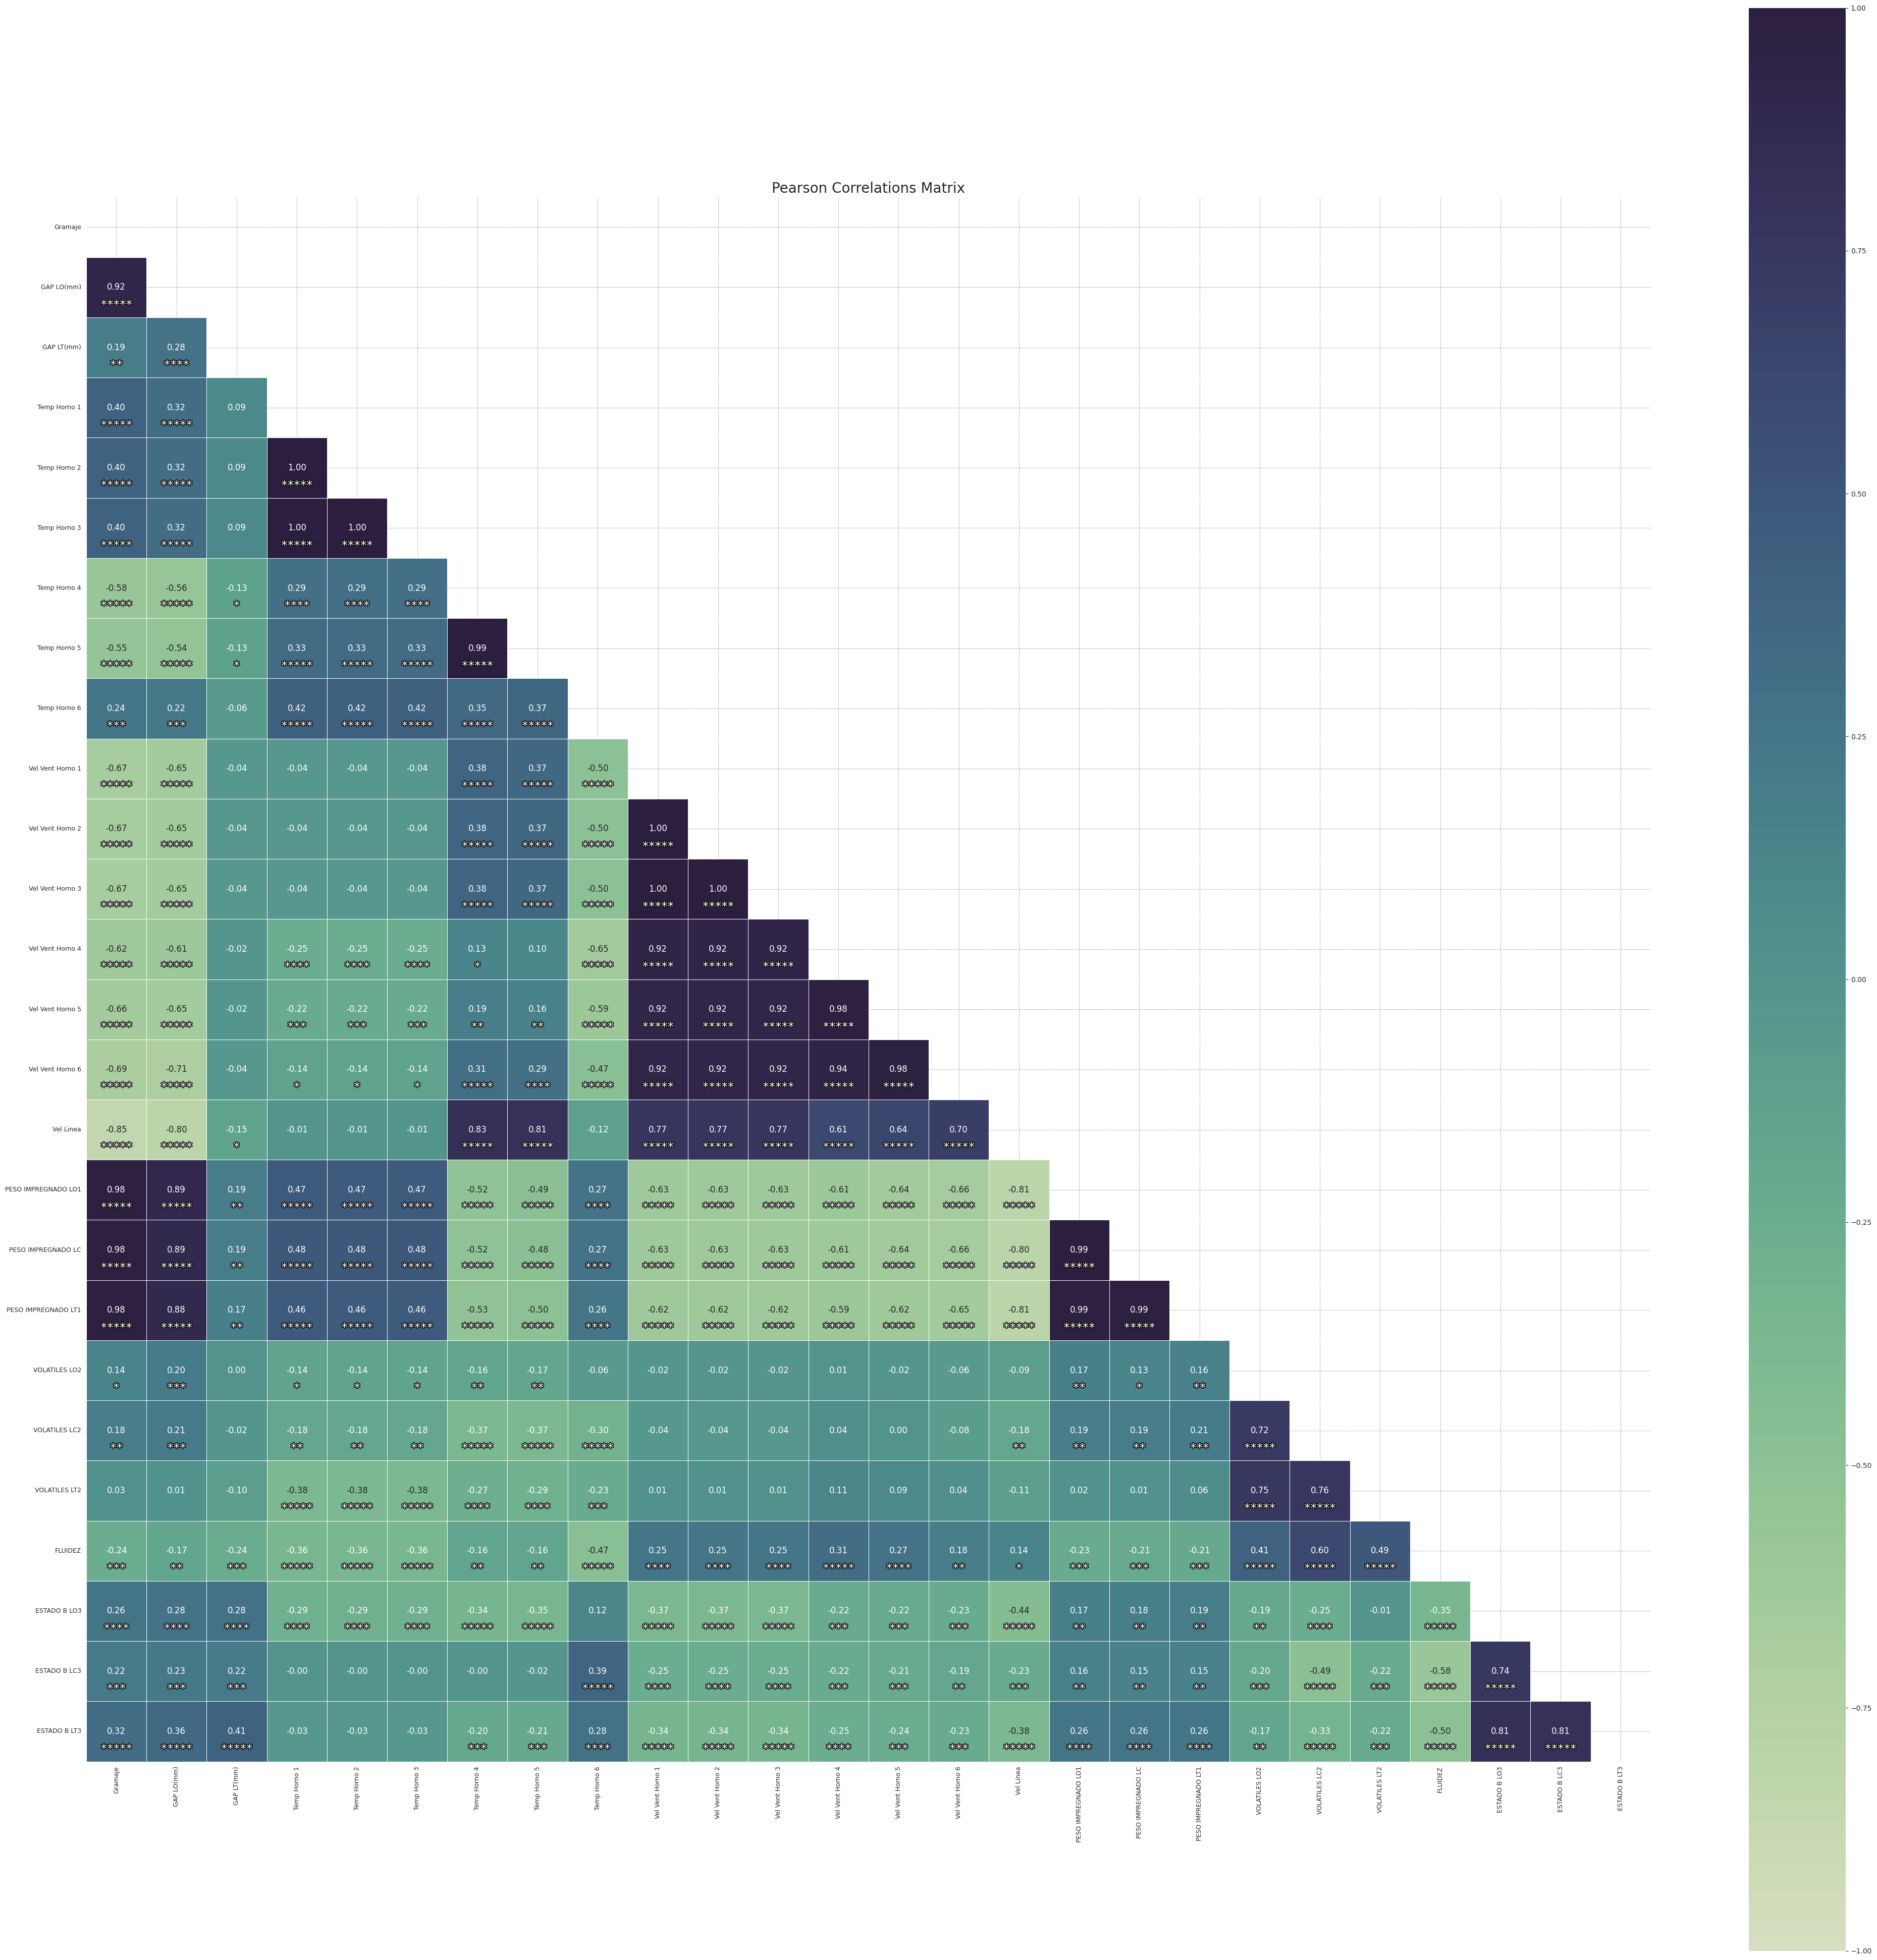

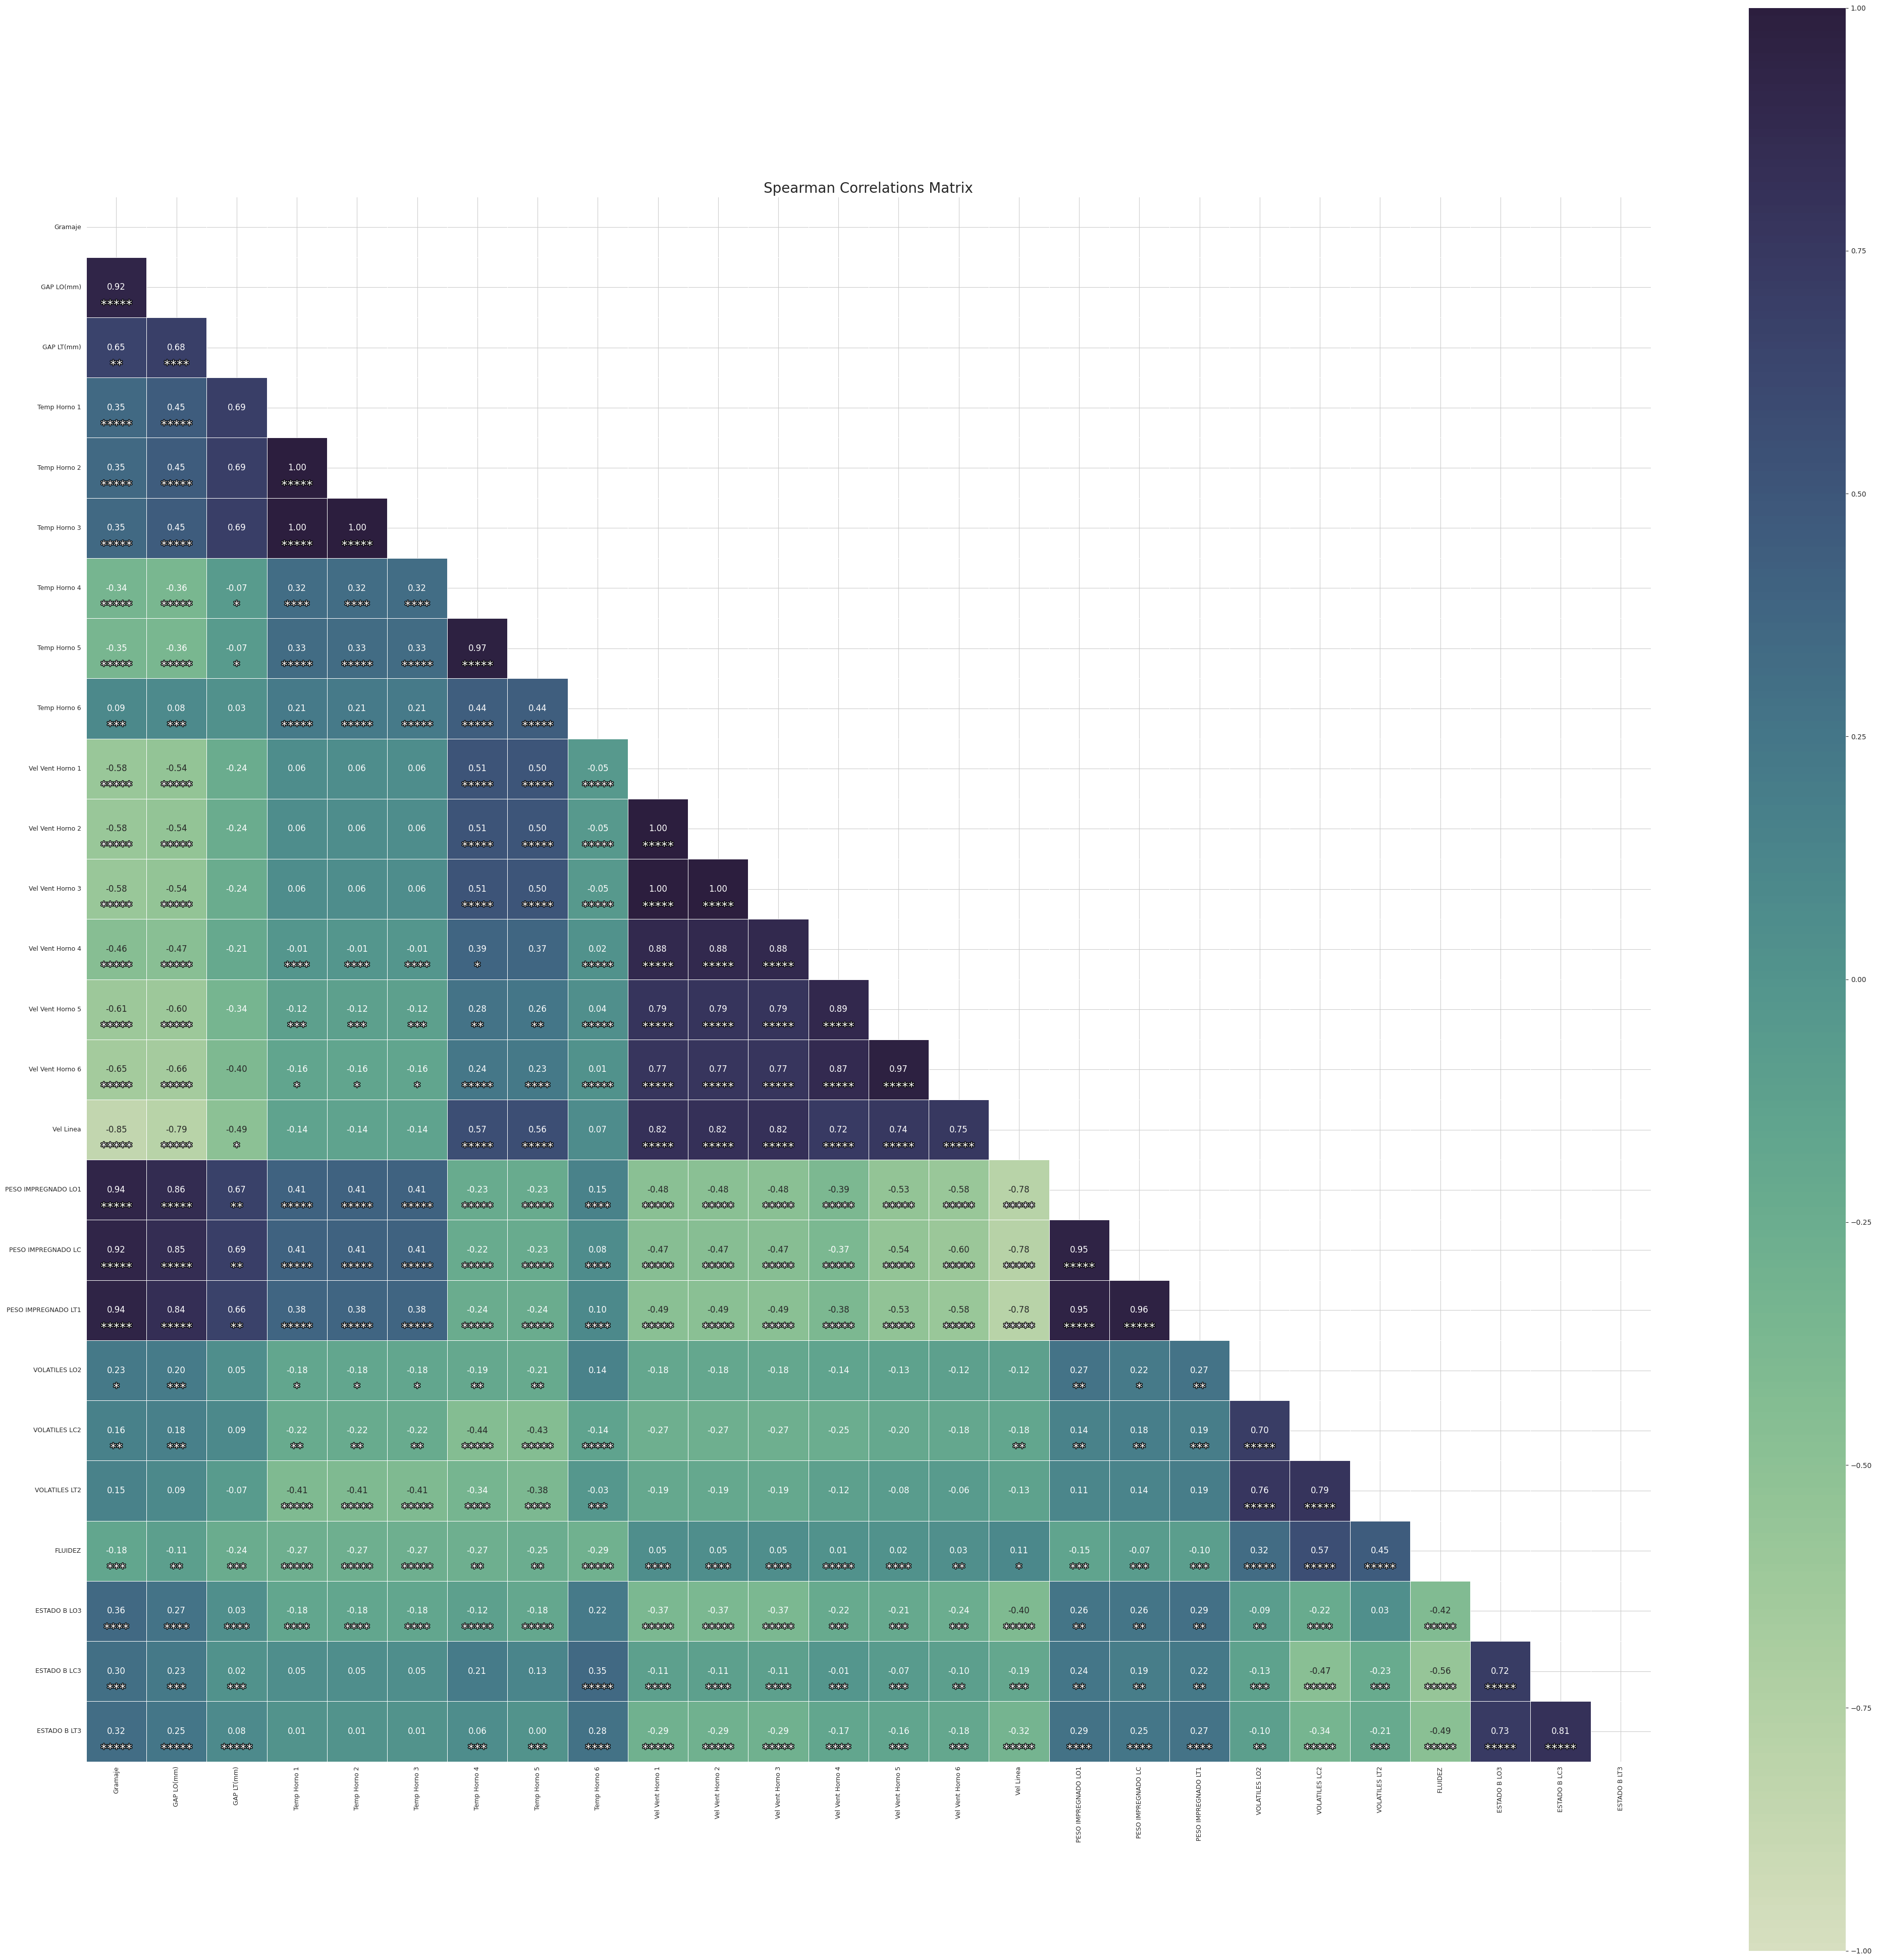

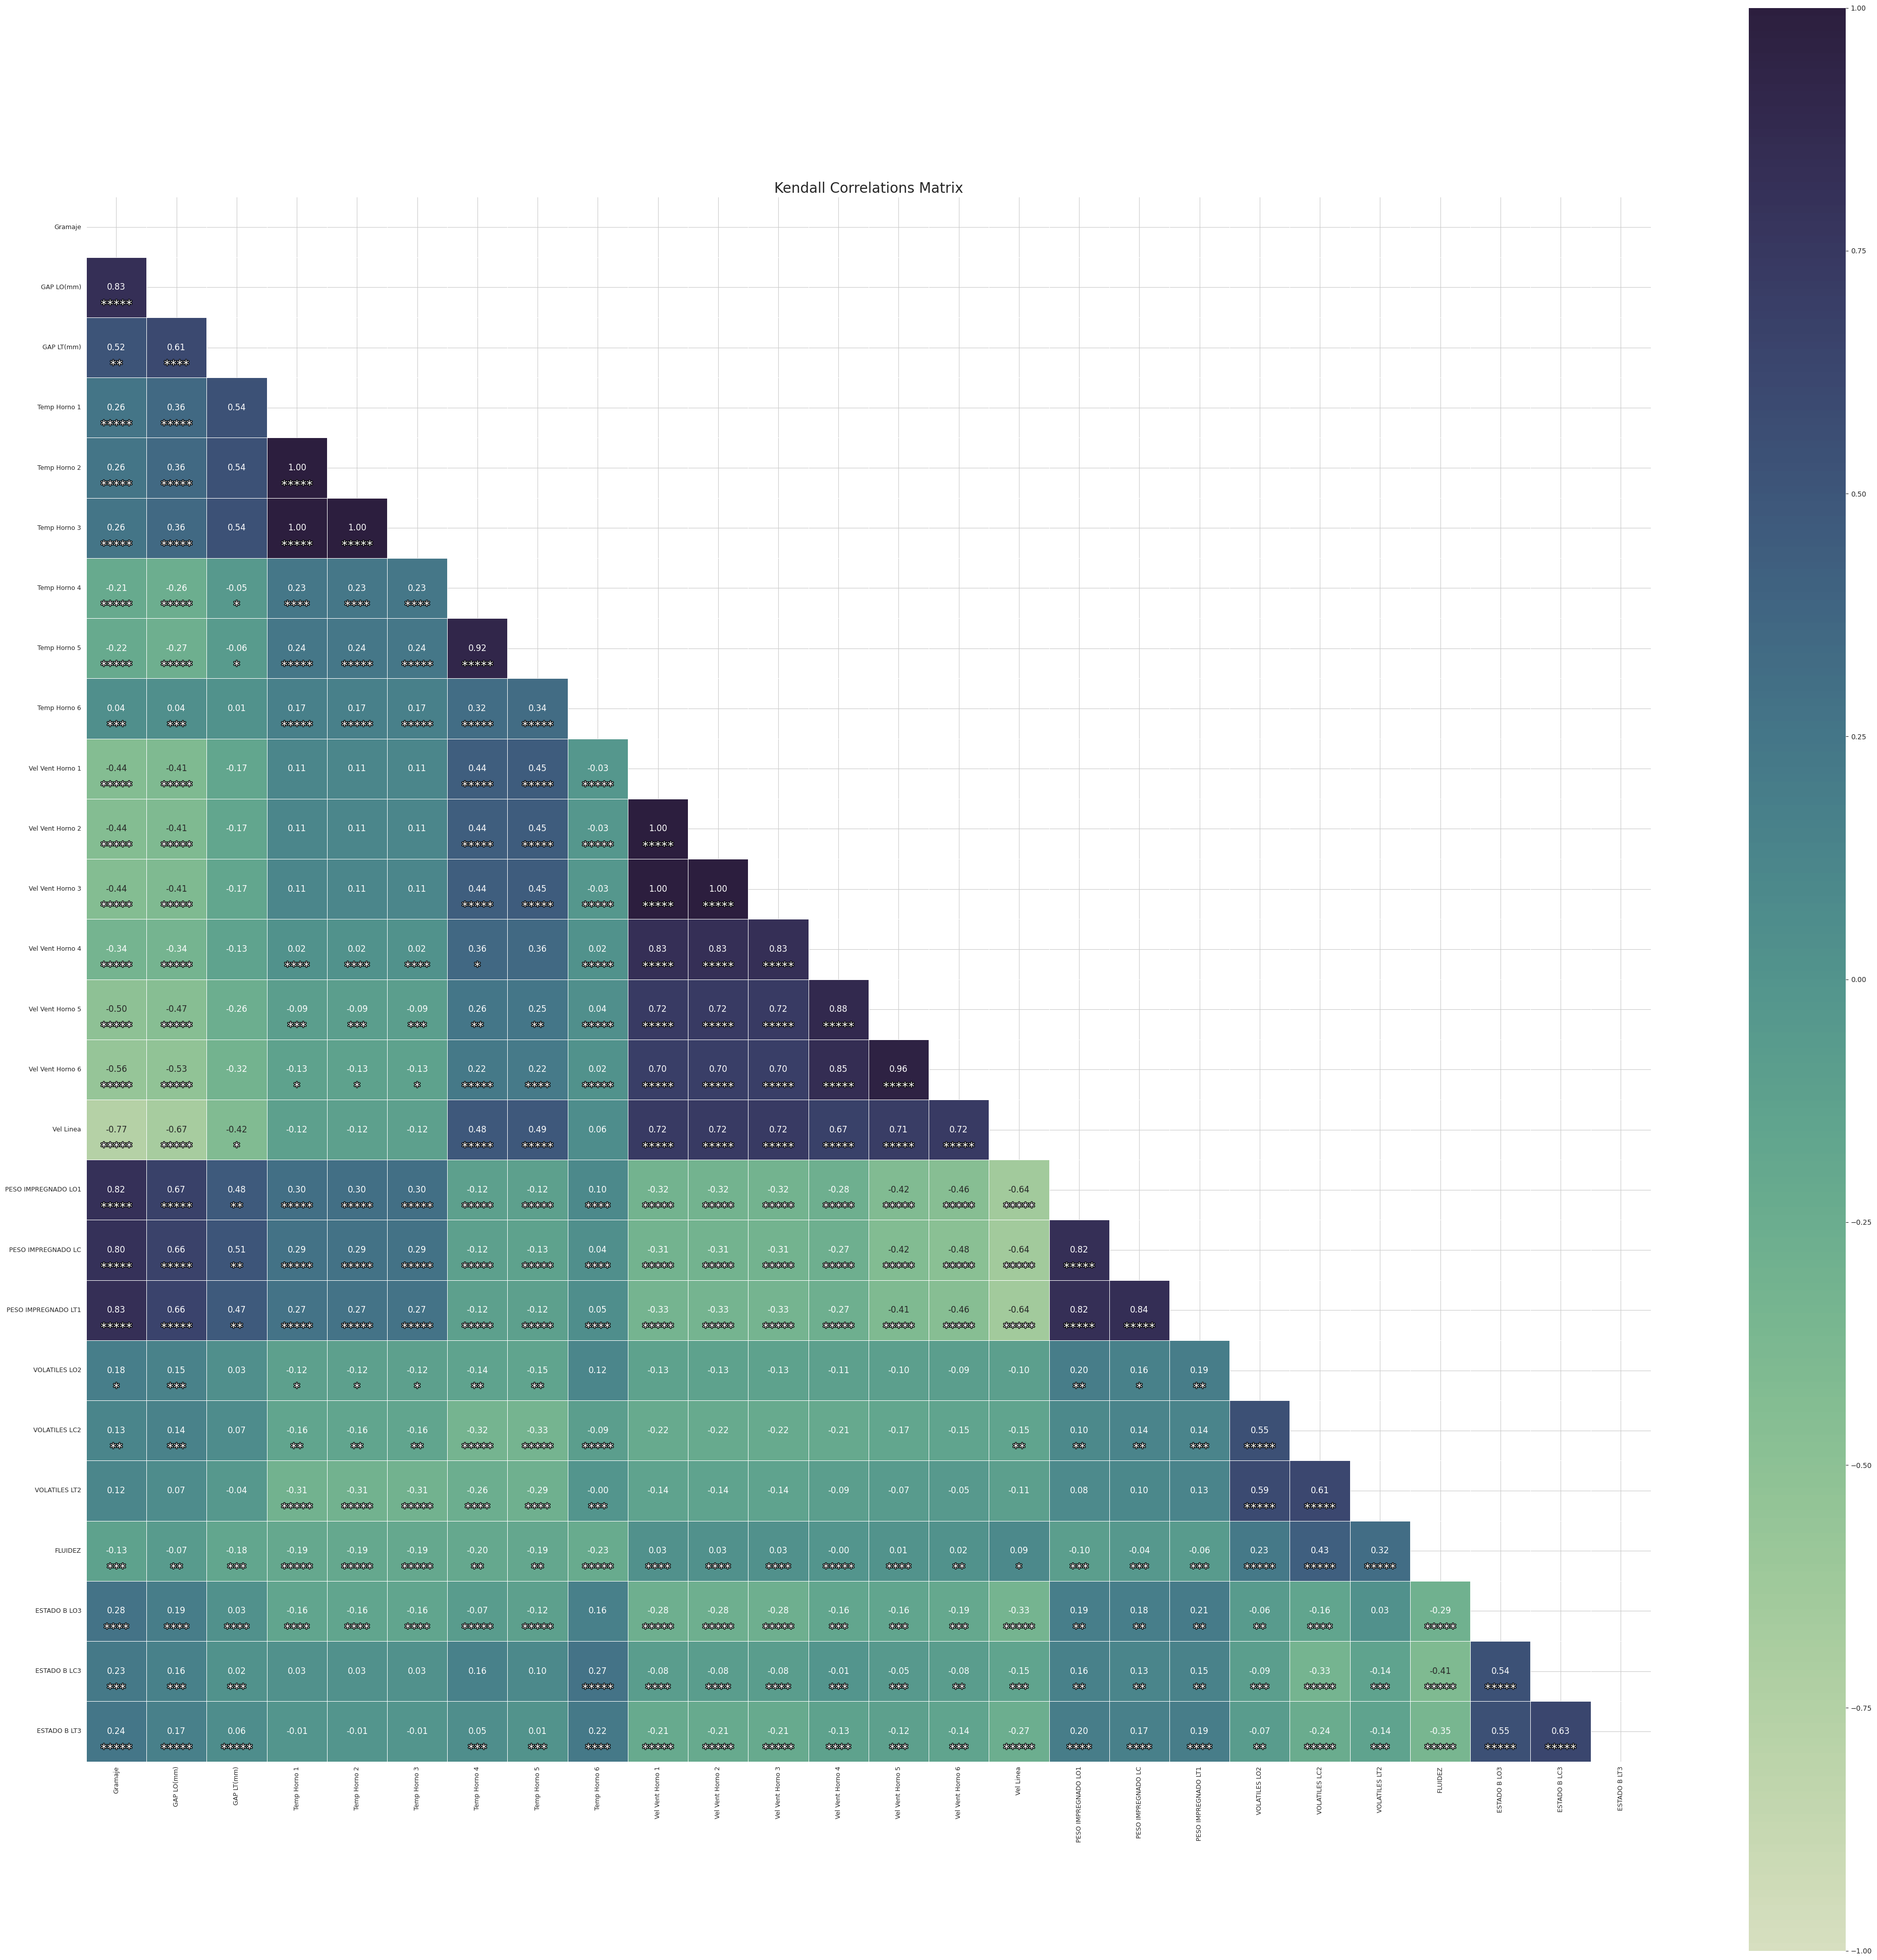

In [38]:
correlation_methods = ['pearson','spearman','kendall']
plot_correlations(df[numerical_features],correlation_methods)

1. Gramaje tiene un fuerte correlación positiva con el GAP LO(mm) debido a que de este lado de operación los rodillos tienen desgaste. Gramaje también tiene una fuerte correlación con el peso impregnado.

2. La temperatura del horno 1 tiene una fuerte correlación positiva con la temperatura del del horno 2 y 3.

3. la temperatua del horno 2 tiene una fuerte correlación positiva con la temperatura del horno3.

4. La temperatura del horno 4, tiene una fuerte correlación positiva con la temperatura del horno 5.

5. La velocidad del ventilador del horno 1 tiene una fuerte correlación positiva con la velocidad del ventilador del horno 2,3 y 4.

6. La velocidad del ventilador del horno 2 tiene una fuerte correlación positiva con la velocidad del ventilador del horno 3 y 4.

7. La velocidad del ventilador del horno 4 tiene una fuerte correlación positiva con la velocidad del ventilador del horno 5.

8. la velocidad del ventilador del horno 5 tiene una fuerte correlación positiva con la velocidad del ventilador del horno 6.

9. El peso impregnado LO1 tiene una fuerte correlación positiva con el peso impregnado LC y LT1.

10. el peso impregnado LC tiene una fuerte correlación positiva con el peso impregnado LT1.

11. la velocidad de la linea tiene una fuerte correlación negativa con el peso impregnado LC, LO1, LC1 y el gramaje del papel.  

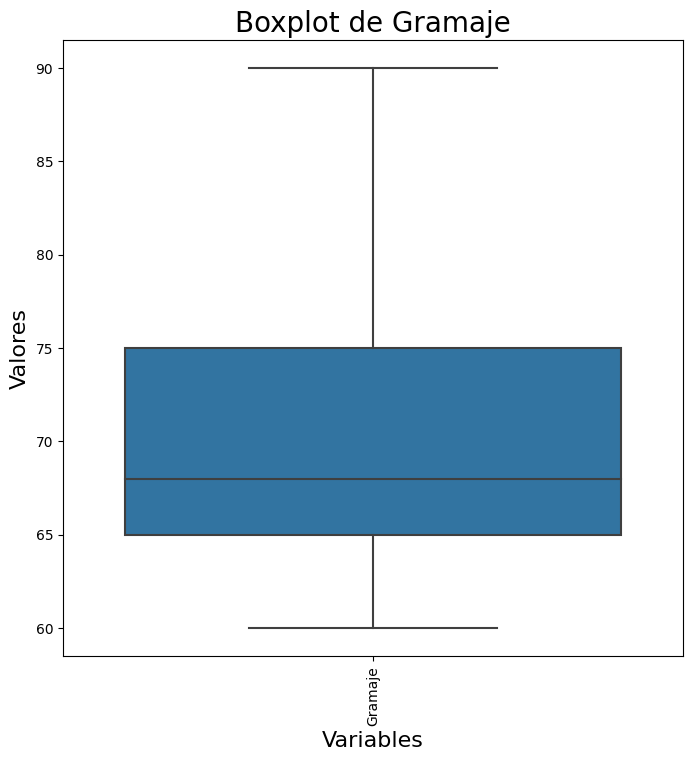

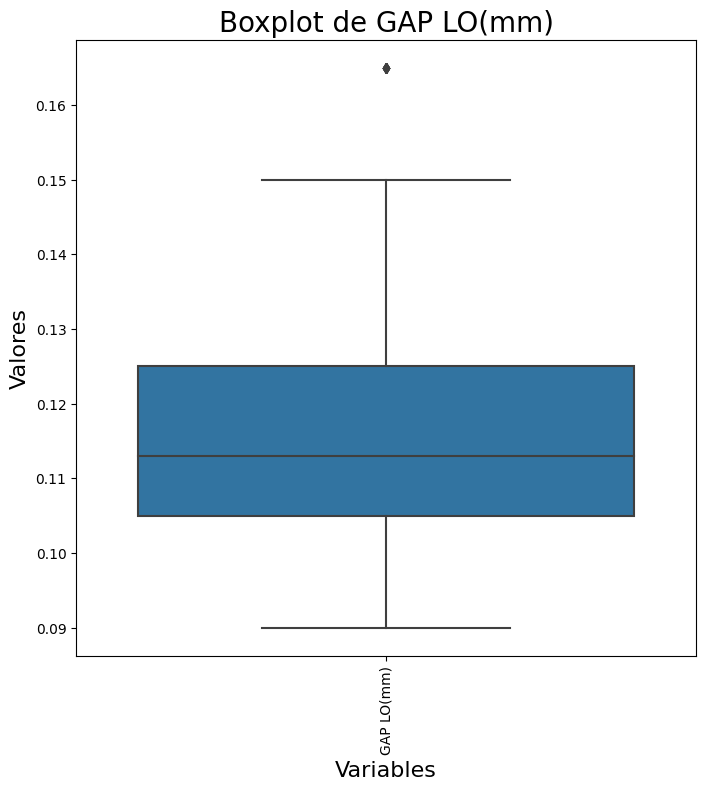

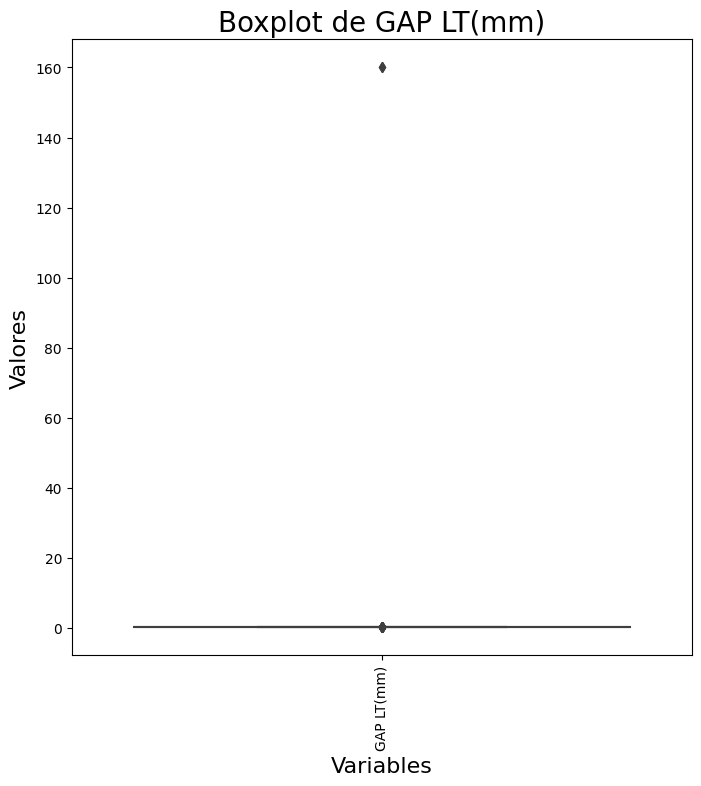

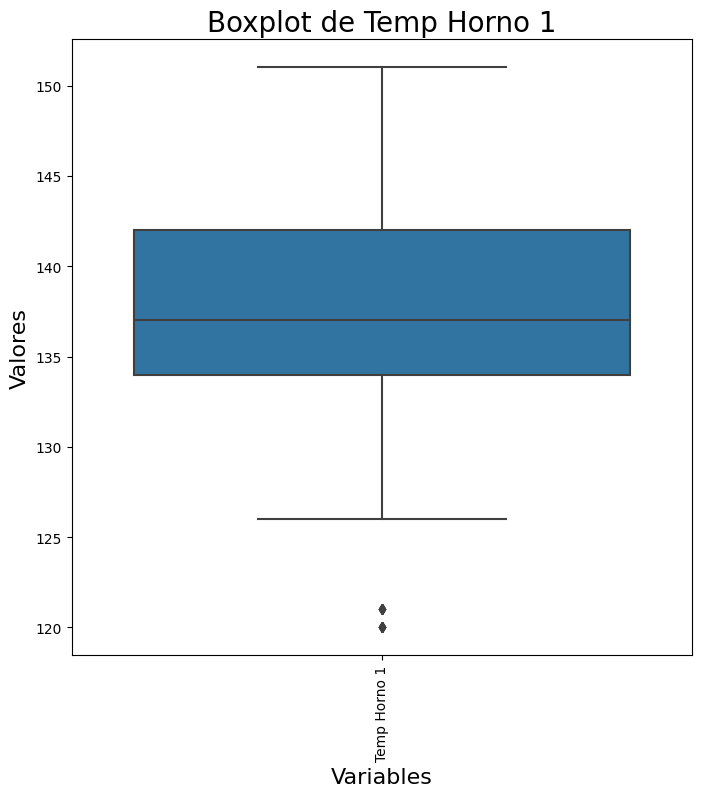

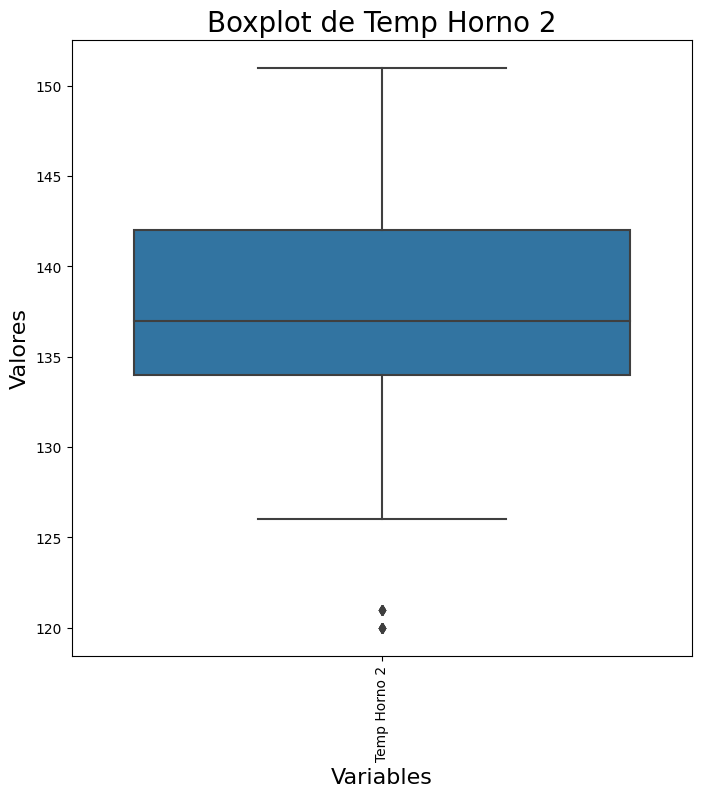

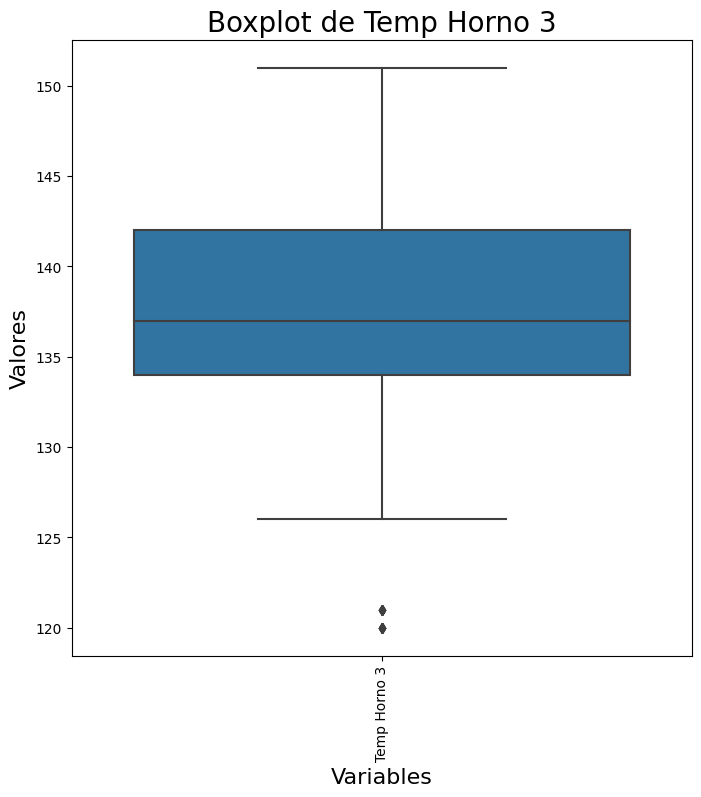

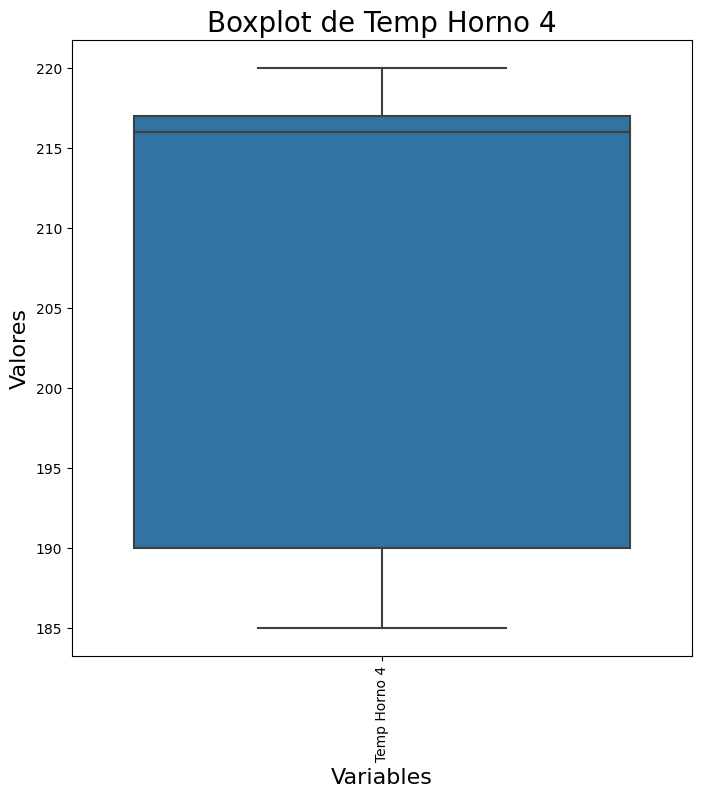

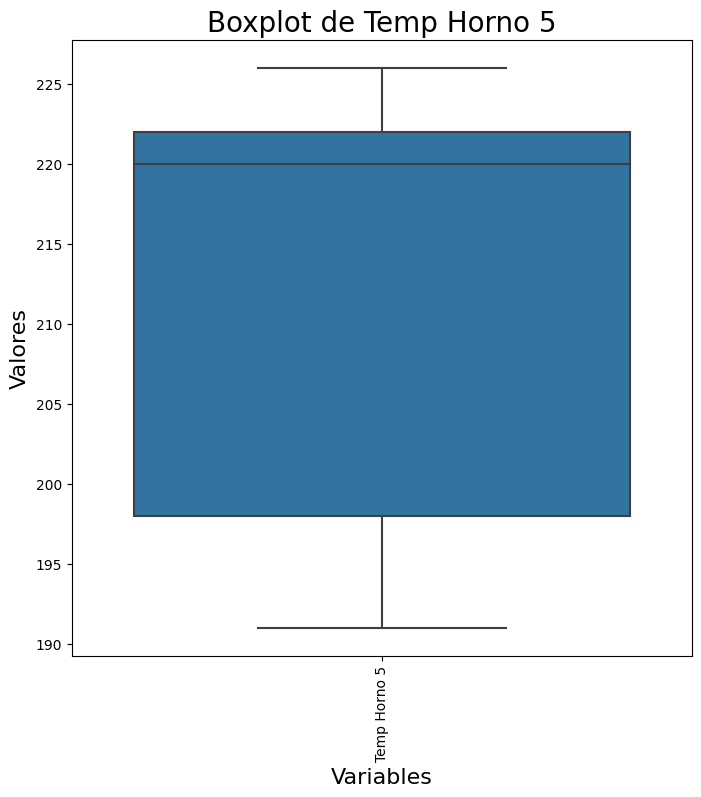

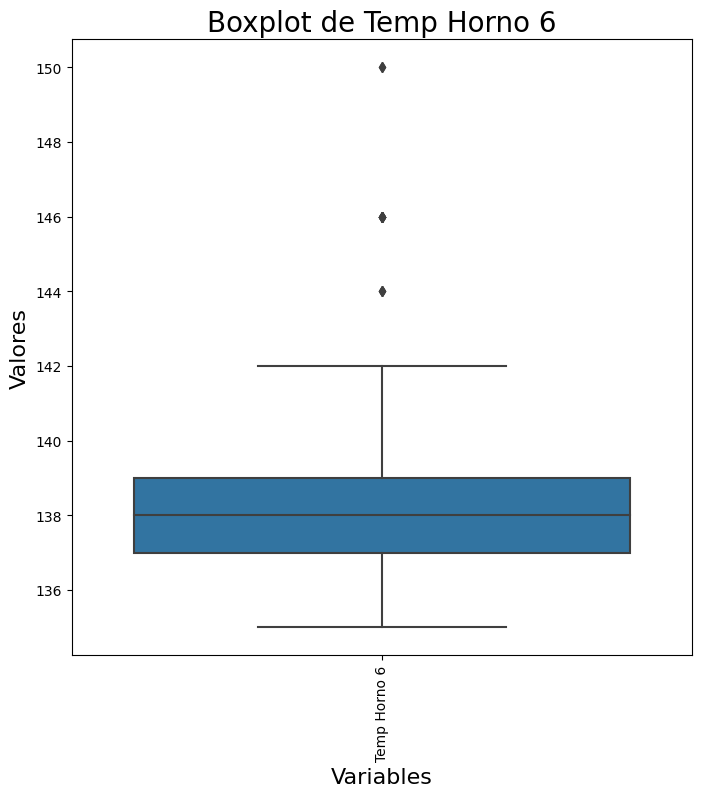

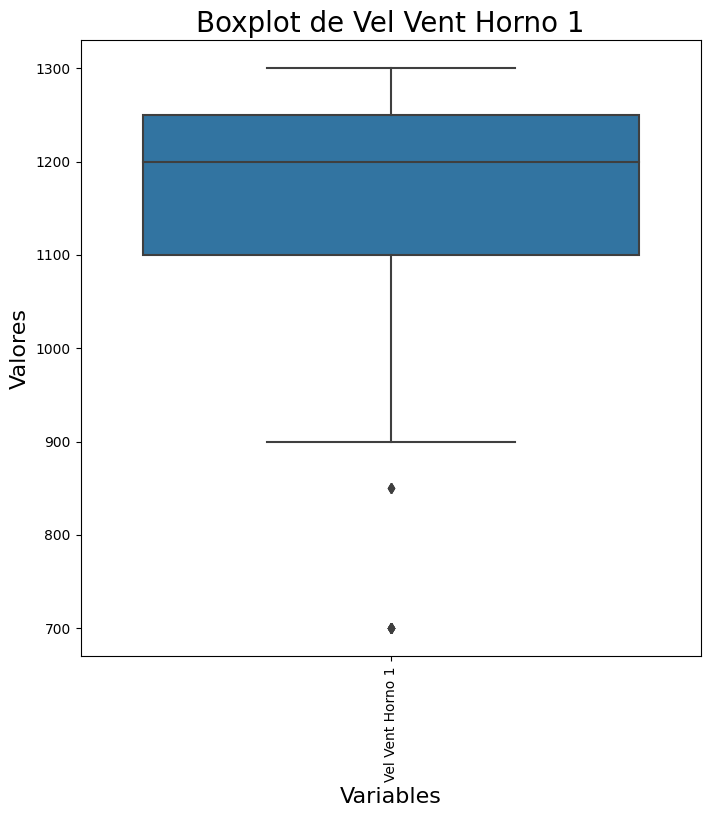

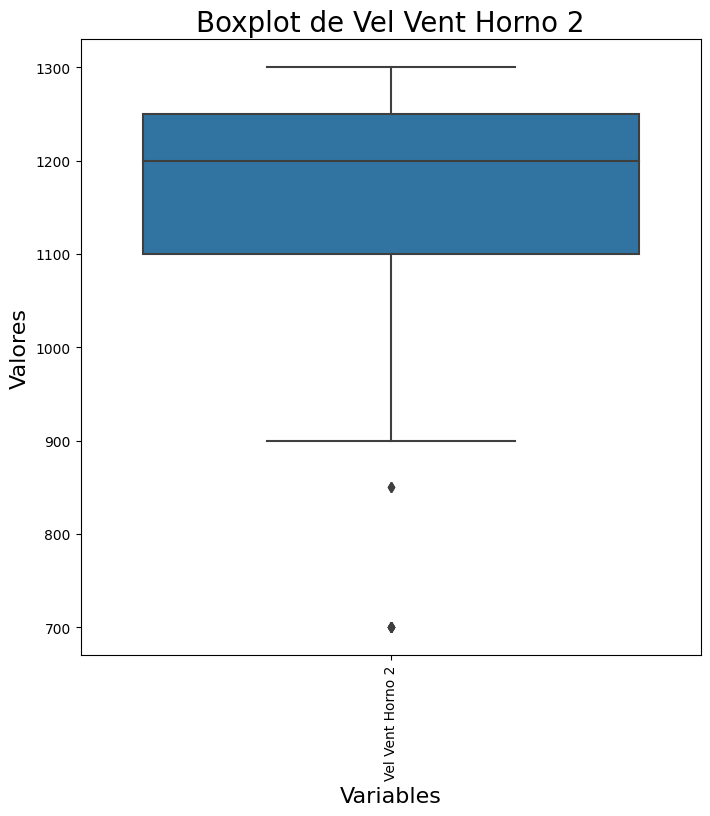

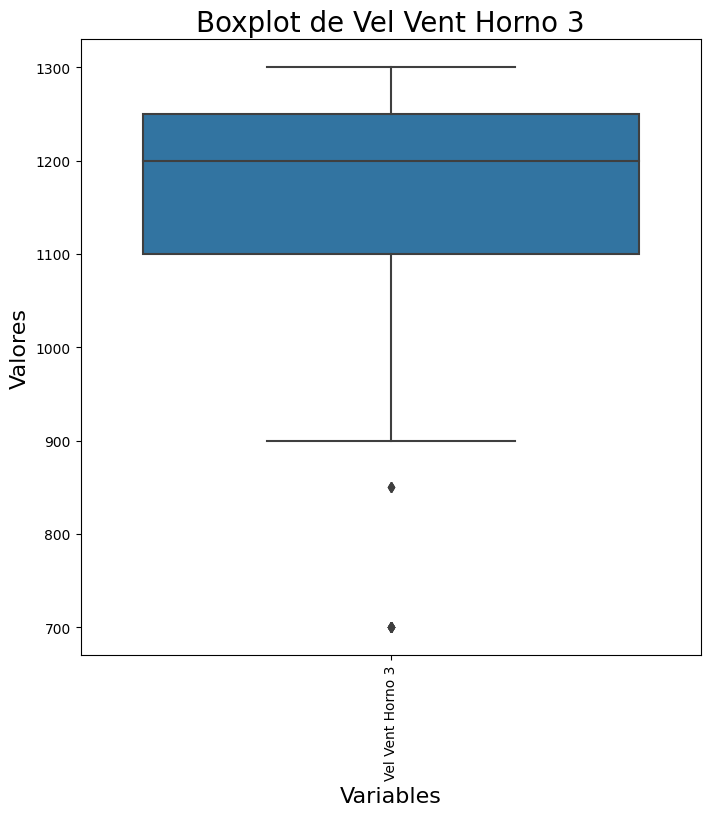

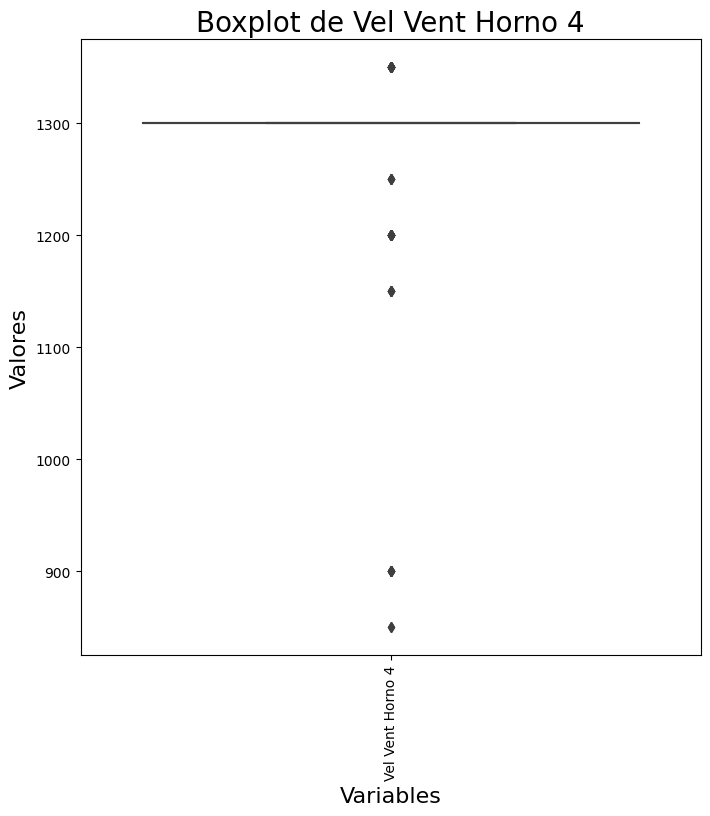

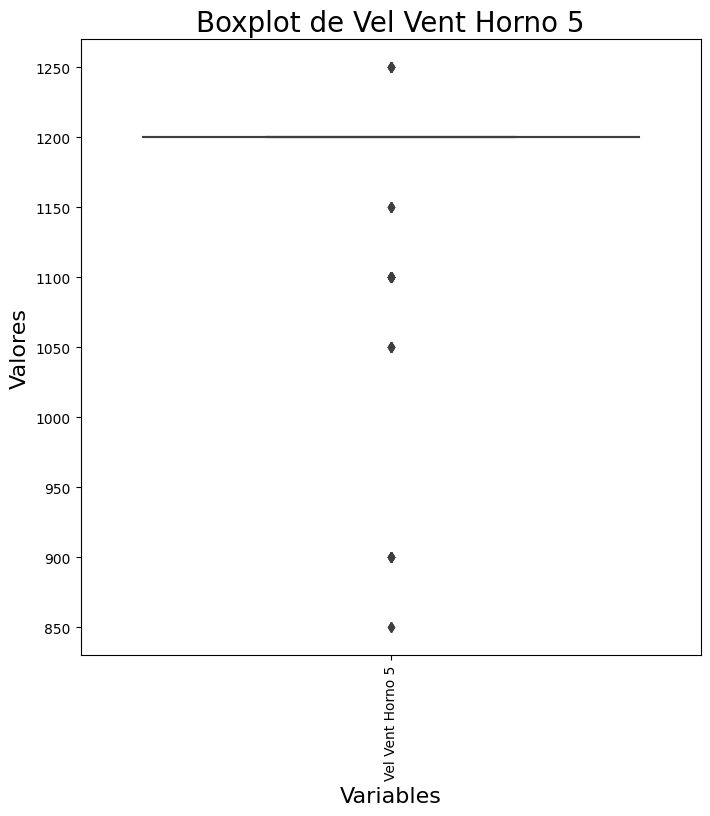

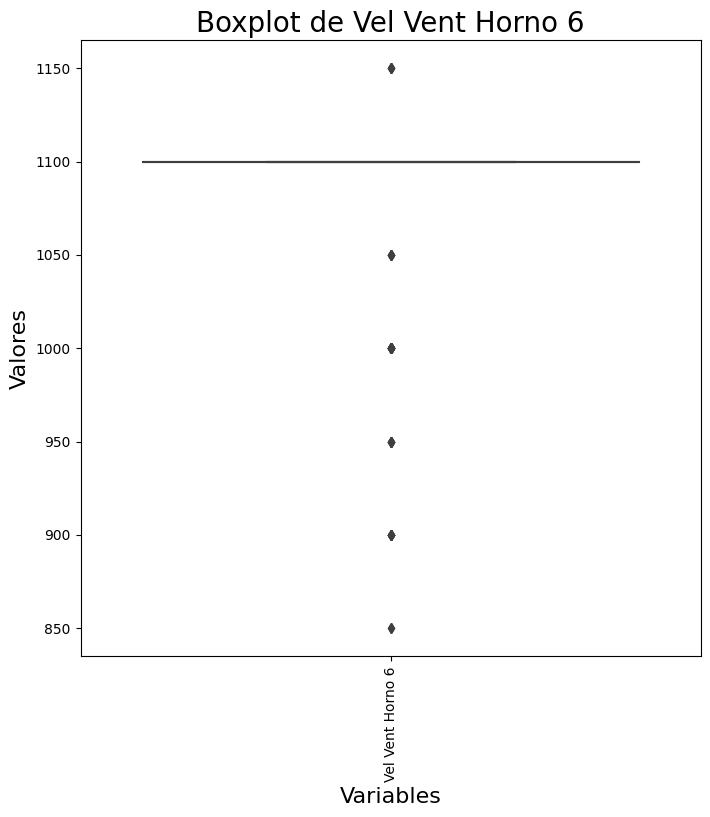

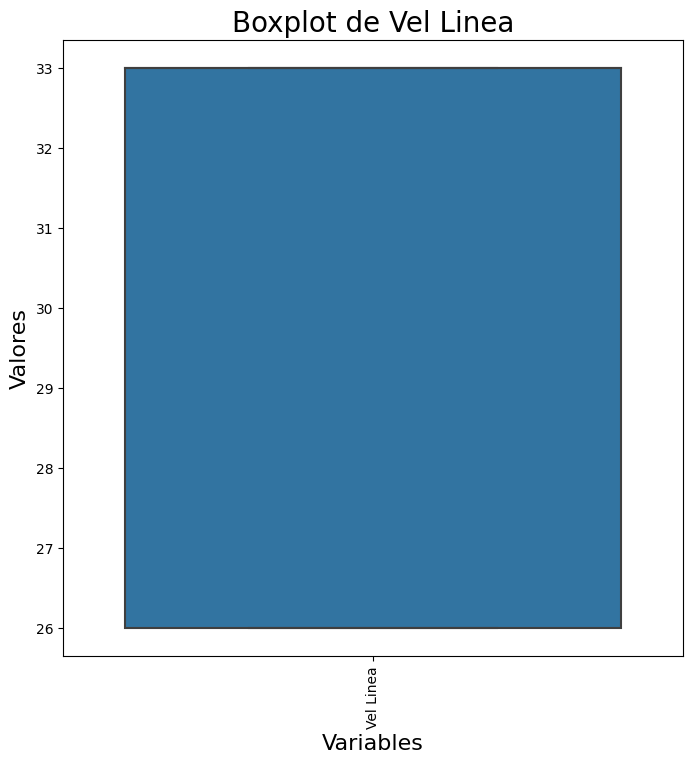

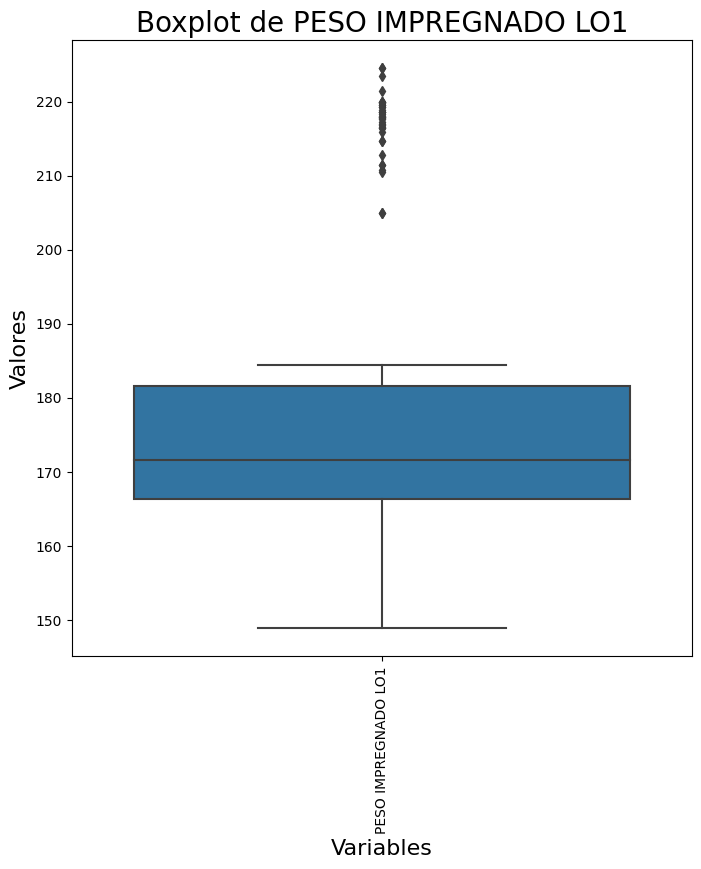

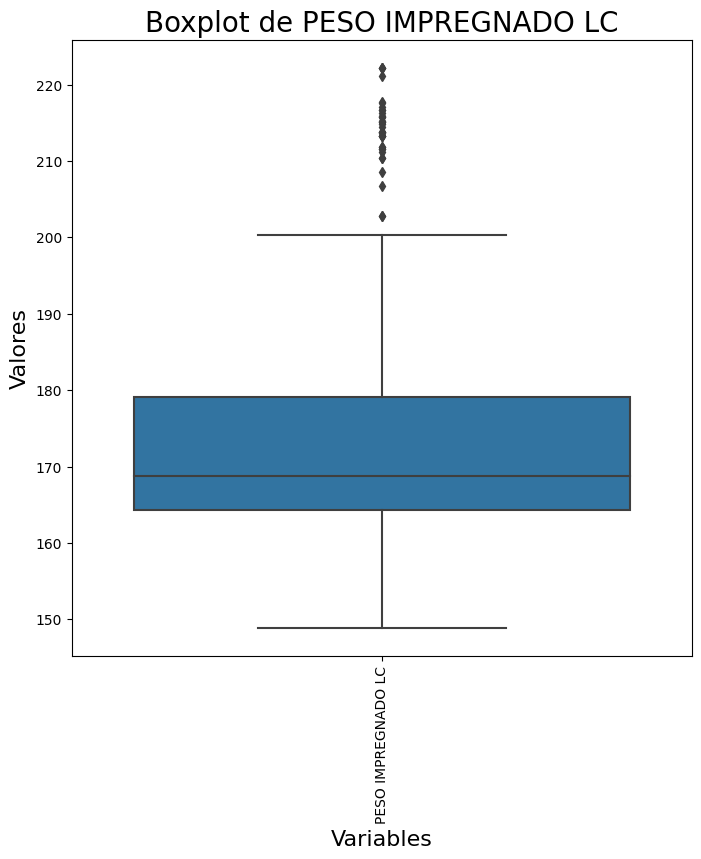

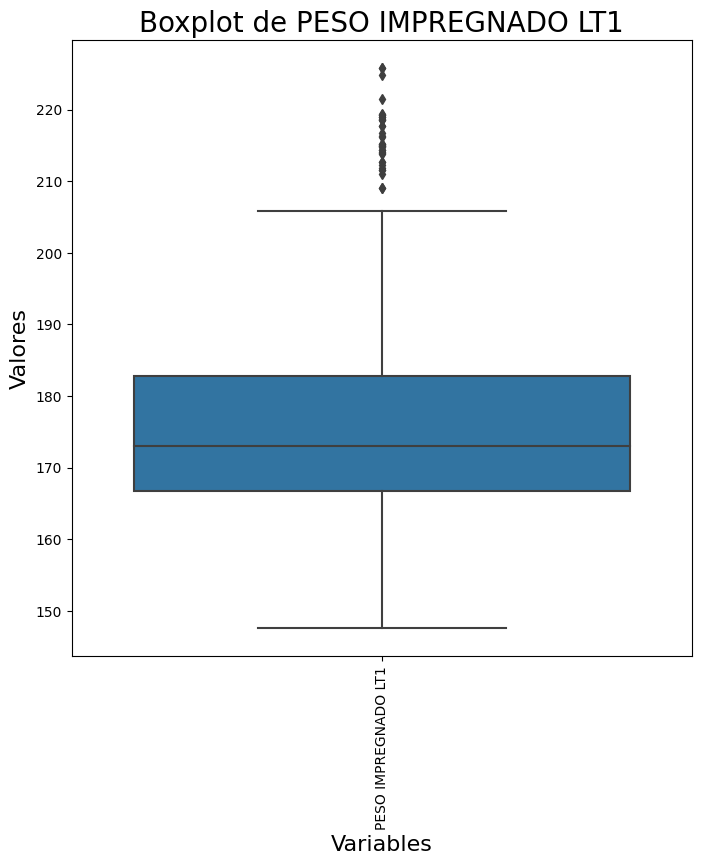

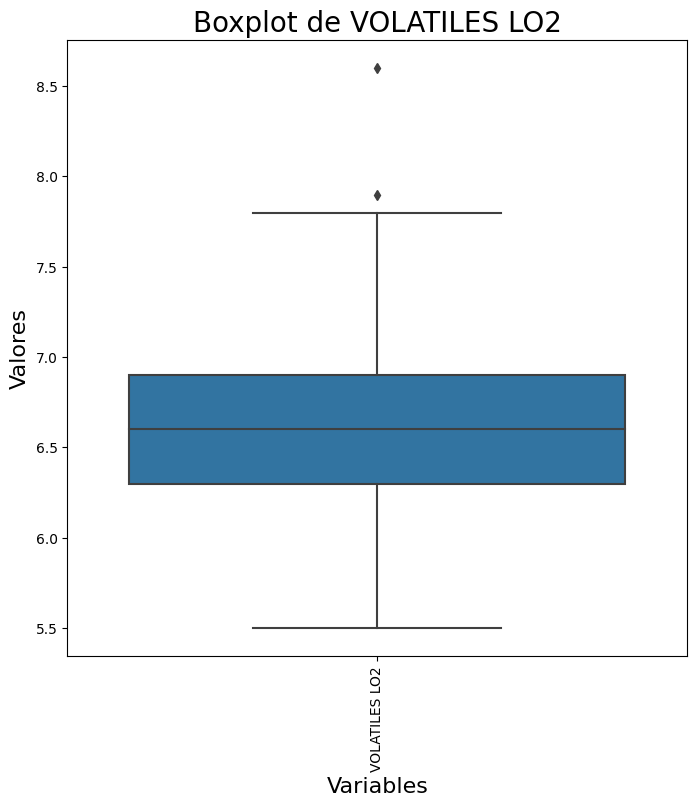

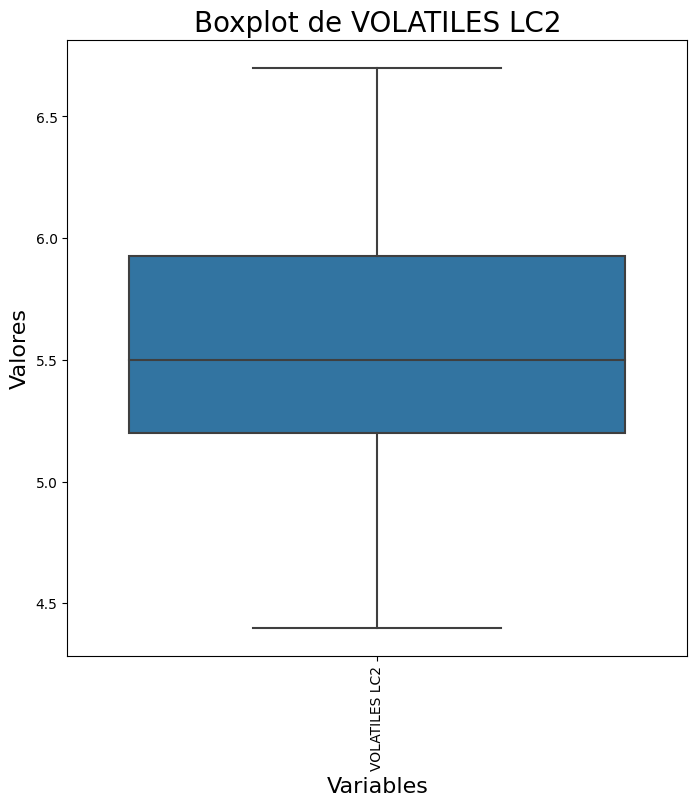

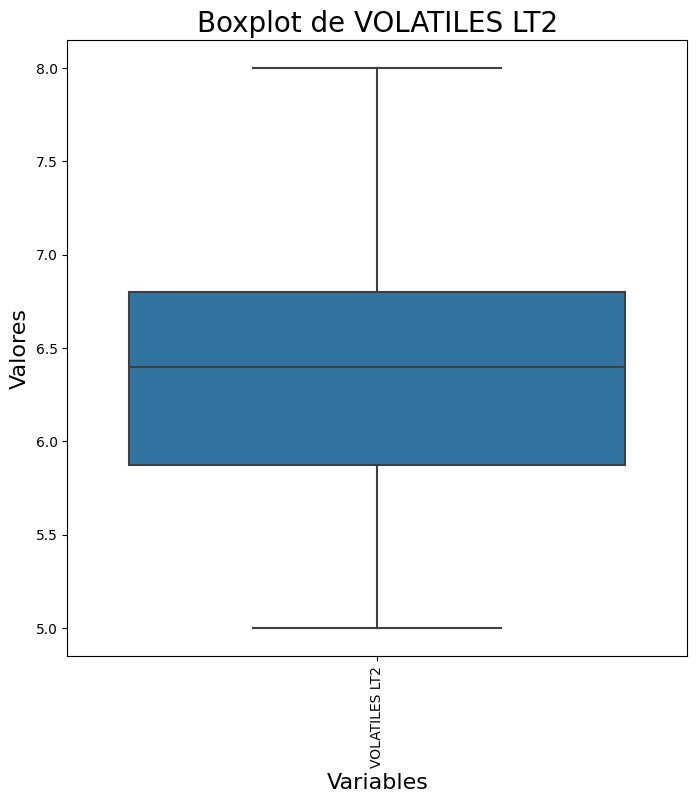

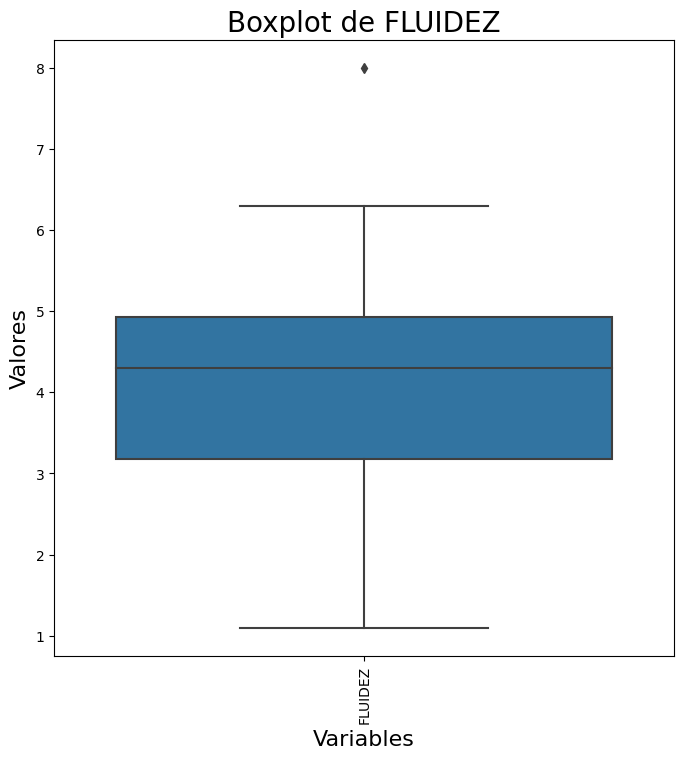

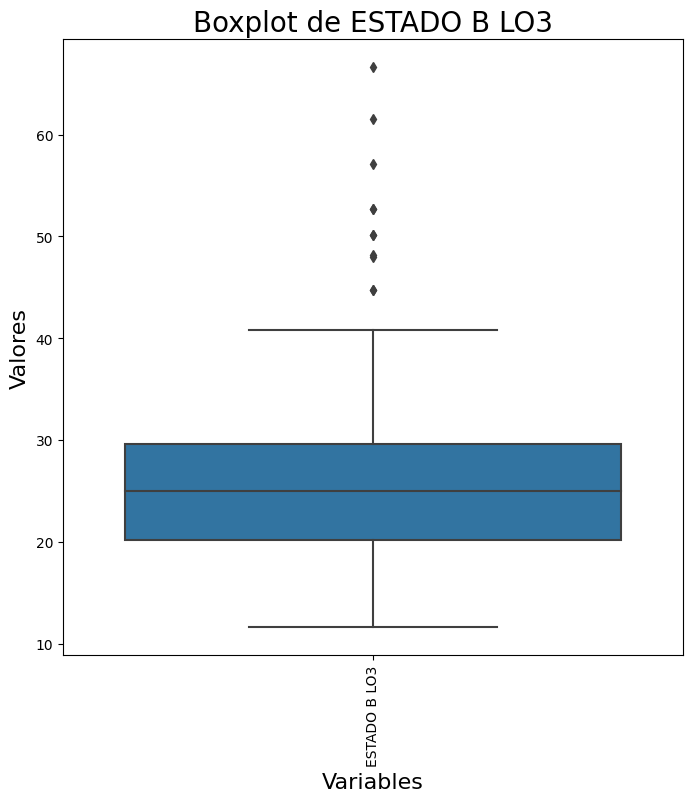

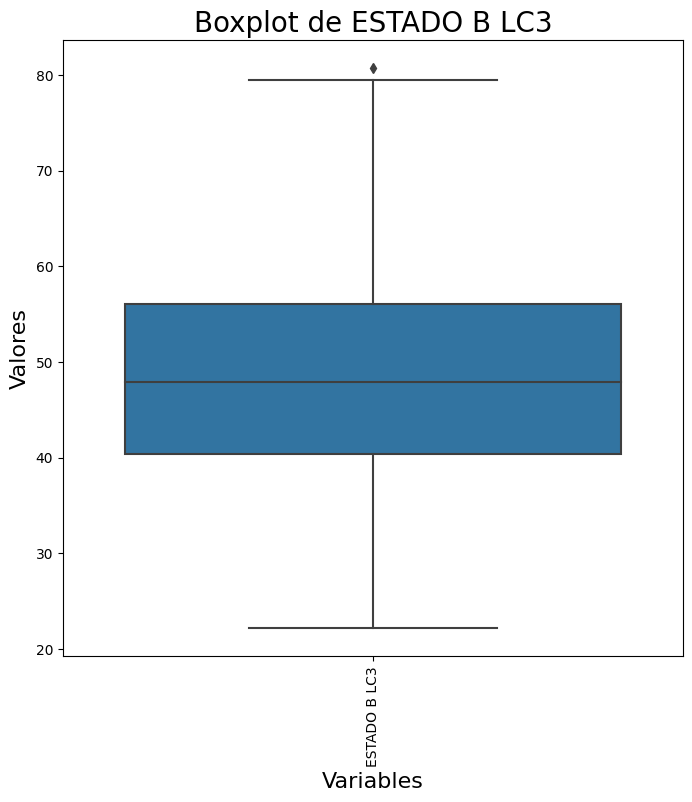

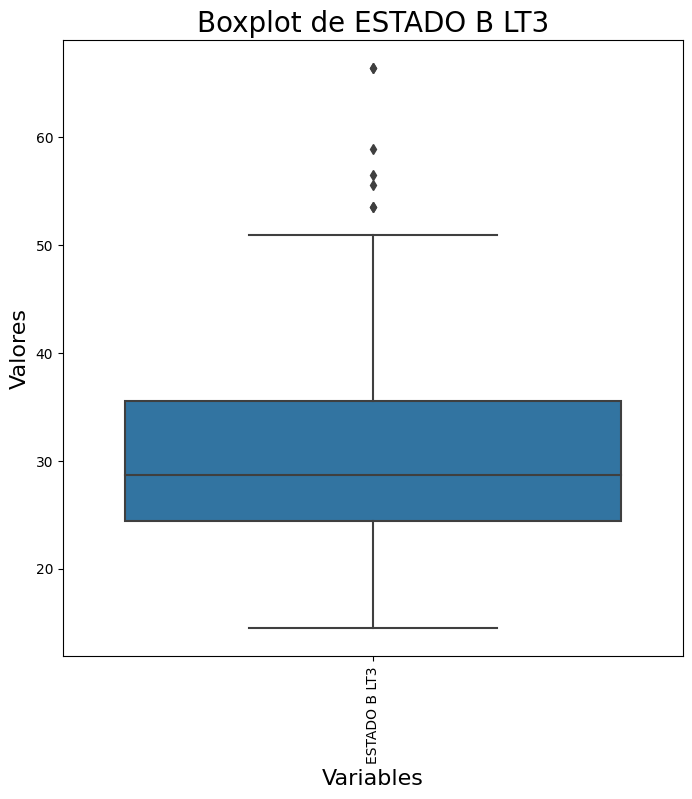

In [40]:
for column in numerical_features:
    plt.figure(figsize=(8, 8))  # Crear una nueva figura para cada plot
    sns.boxplot(data=df[[column]])  # Realizar un boxplot para la columna actual
    plt.title(f'Boxplot de {column}', fontsize=20)  # Personalizar el título con el nombre de la columna
    plt.xlabel('Variables', fontsize=16)
    plt.ylabel('Valores', fontsize=16)
    plt.xticks(rotation=90)  # Es posible que no necesite esta línea, ya que hay solo una variable
    plt.show()  # Mostrar el plot

De las graficas anteriores se observa en la grafica del GAP LT(mm) un datos atipico muy pero muy elevado. Estos datos atipicos deben ser eliminados. Se observa que este dato atipico corresponde a 160 y reemplazamos este valor por la moda.

In [44]:
df["GAP LT(mm)"]=df["GAP LT(mm)"].replace(160,df["GAP LT(mm)"].mode()[0],regex=True)

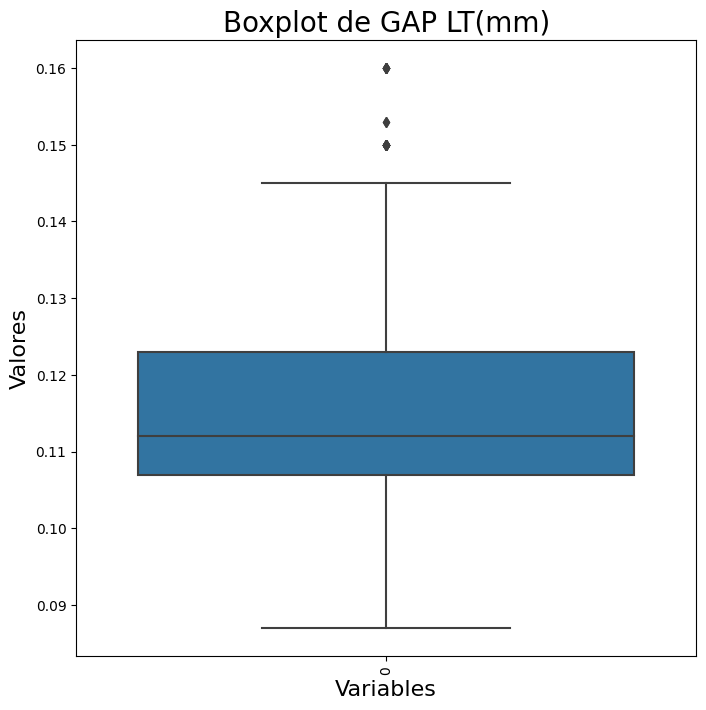

In [49]:
plt.figure(figsize=(8, 8))  # Crear una nueva figura para cada plot
sns.boxplot(data=df["GAP LT(mm)"])  # Realizar un boxplot para la columna actual
plt.title(f'Boxplot de GAP LT(mm)', fontsize=20)  # Personalizar el título con el nombre de la columna
plt.xlabel('Variables', fontsize=16)
plt.ylabel('Valores', fontsize=16)
plt.xticks(rotation=90)  # Es posible que no necesite esta línea, ya que hay solo una variable
plt.show()  # Mostrar el plot

Se puede observar que el diagrama de cajas de la variable GAP LT(mm) mejoró mucho  y ya no tiene un valor atipico tan grande.

**ANALISIS DE CARACTERISTICAS PRINCIPAL PARA EL DATAFRAME DATA**

In [66]:
pca = PCA(n_components=2)
components = pca.fit_transform(data)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
total_var = pca.explained_variance_ratio_.sum() * 100

features=data.columns.values

fig = px.scatter(
    components, x=0, y=1,
        title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'}
)
for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

en la figura anterior se puede observar que las caracteristicas Vel Vent Horno 4, 5 6 se mueven en la misma dirección.

Vel vent horno 1 y 2 se mueven en la misma dirección.

Temp horno 1 y 2 se mueven en la misma dirección.

Temp horno 4 y 5 se mueven en la misma dirección.

Gramaje y tem horno 6 se muerve en la misma dirección de peso impregnado LC1,LT1 y LO1.

Diseño y Estado B LO3, LT3 y LC3 se mueven en la misma dirección.



# Etapa 2: Prepación de los datos



**SE CODIFICA LAS CARACTERISTICAS QUE CONTIENEN VALORES CATEGORICOS**

In [55]:
df['DISENO']=df['DISENO'].astype('category').cat.codes
df['PLANTA']=df['PLANTA'].astype('category').cat.codes

df['DISENO']=df['DISENO'].astype('object')
df['PLANTA']=df['PLANTA'].astype('object')


##se realiza copia del dataframe

In [57]:
df2=df.copy()

##se normaliza los datos

In [58]:
scaler = StandardScaler()
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
df2.head()

DISENO   Gramaje PLANTA  GAP LO(mm)  GAP LT(mm)  Temp Horno 1  Temp Horno 2  \
0     13 -1.249123      3    -1.49363    -1.75091     -1.614830     -1.614830   
1     13 -1.249123      3    -1.49363    -1.75091     -1.614830     -1.614830   
2     13 -1.249123      0    -1.49363    -1.75091     -1.035277     -1.035277   
3     13 -1.249123      0    -1.49363    -1.75091     -1.035277     -1.035277   
4     13 -1.249123      0    -1.49363    -1.75091     -1.035277     -1.035277   

   Temp Horno 3  Temp Horno 4  Temp Horno 5  ...  PESO IMPREGNADO LO1  \
0     -1.614830      0.683540      0.555263  ...            -1.239091   
1     -1.614830      0.683540      0.555263  ...            -1.239091   
2     -1.035277      0.459315      0.555263  ...            -1.282675   
3     -1.035277      0.459315      0.555263  ...            -1.142239   
4     -1.035277      0.459315      0.555263  ...            -1.515120   

   PESO IMPREGNADO LC  PESO IMPREGNADO LT1  VOLATILES LO2  VOLATILES LC2  \
0           -1.112165            -1.239206      -1.662637      -1.340492   
1           -1.112165            -1.239206      -1.662637      -1.340492   
2           -1.166810            -1.429330      -0.727472       0.431567   
3           -1.191649            -1.319258      -1.662637      -0.749805   
4           -1.430100            -1.639467      -1.849670      -1.143596   

   VOLATILES LT2   FLUIDEZ  ESTADO B LO3  ESTADO B LC3  ESTADO B LT3  
0      -1.260710  0.115967      1.041590      0.822895      1.256443  
1      -1.260710  0.115967      1.041590      0.822895      1.256443  
2      -0.441201  0.860852     -0.436829     -0.819508     -0.036128  
3      -0.932906  0.860852     -0.205136     -0.390703     -0.142952  
4      -1.096808  0.115967     -0.624390     -0.965140     -0.986861  

[5 rows x 28 columns]

**SEPARAMOS LOS DOS TARGET DEL DATAFRAME**

In [78]:
target1=df2.iloc[:,3:4]
target1

GAP LO(mm)
0     -1.493630
1     -1.493630
2     -1.493630
3     -1.493630
4     -1.493630
..          ...
167    0.349922
168    0.349922
169    0.349922
170    0.349922
171    0.349922

[172 rows x 1 columns]

In [79]:
target2=df2.iloc[:,4:5]
target2

GAP LT(mm)
0     -1.750910
1     -1.750910
2     -1.750910
3     -1.750910
4     -1.750910
..          ...
167   -0.748354
168   -0.748354
169   -0.748354
170   -0.748354
171   -0.748354

[172 rows x 1 columns]

**CREAMOS EL DATA DEL DATAFRAME**

In [80]:
data=df2.drop(['GAP LO(mm)','GAP LT(mm)'], axis=1)
data

DISENO   Gramaje PLANTA  Temp Horno 1  Temp Horno 2  Temp Horno 3  \
0       13 -1.249123      3     -1.614830     -1.614830     -1.614830   
1       13 -1.249123      3     -1.614830     -1.614830     -1.614830   
2       13 -1.249123      0     -1.035277     -1.035277     -1.035277   
3       13 -1.249123      0     -1.035277     -1.035277     -1.035277   
4       13 -1.249123      0     -1.035277     -1.035277     -1.035277   
..     ...       ...    ...           ...           ...           ...   
167      7 -0.034142      1     -2.339271     -2.339271     -2.339271   
168      7 -0.034142      1     -2.339271     -2.339271     -2.339271   
169      7 -0.034142      1     -2.339271     -2.339271     -2.339271   
170      7 -0.034142      1     -2.339271     -2.339271     -2.339271   
171      7 -0.034142      1     -2.339271     -2.339271     -2.339271   

     Temp Horno 4  Temp Horno 5  Temp Horno 6  Vel Vent Horno 1  ...  \
0        0.683540      0.555263      1.375578         -0.352339  ...   
1        0.683540      0.555263      1.375578         -0.352339  ...   
2        0.459315      0.555263     -0.541759         -0.352339  ...   
3        0.459315      0.555263     -0.541759         -0.352339  ...   
4        0.459315      0.555263     -0.541759         -0.352339  ...   
..            ...           ...           ...               ...  ...   
167     -1.708199     -1.955753     -0.158292         -1.648647  ...   
168     -1.708199     -1.955753     -0.158292         -1.648647  ...   
169     -1.708199     -1.955753     -0.158292         -1.648647  ...   
170     -1.708199     -1.955753     -0.158292         -1.648647  ...   
171     -1.708199     -1.955753     -0.158292         -1.648647  ...   

     PESO IMPREGNADO LO1  PESO IMPREGNADO LC  PESO IMPREGNADO LT1  \
0              -1.239091           -1.112165            -1.239206   
1              -1.239091           -1.112165            -1.239206   
2              -1.282675           -1.166810            -1.429330   
3              -1.142239           -1.191649            -1.319258   
4              -1.515120           -1.430100            -1.639467   
..                   ...                 ...                  ...   
167            -0.265725           -0.138490            -0.233553   
168            -0.023594           -0.222941            -0.018413   
169            -0.091390           -0.322296            -0.243559   
170            -0.173715           -0.262683            -0.108472   
171            -0.173715           -0.262683            -0.108472   

     VOLATILES LO2  VOLATILES LC2  VOLATILES LT2   FLUIDEZ  ESTADO B LO3  \
0        -1.662637      -1.340492      -1.260710  0.115967      1.041590   
1        -1.662637      -1.340492      -1.260710  0.115967      1.041590   
2        -0.727472       0.431567      -0.441201  0.860852     -0.436829   
3        -1.662637      -0.749805      -0.932906  0.860852     -0.205136   
4        -1.849670      -1.143596      -1.096808  0.115967     -0.624390   
..             ...            ...            ...       ...           ...   
167       0.207694       1.022254       0.870014  1.109147      0.335480   
168       0.955826       0.628463       0.378308  0.695322      0.556139   
169       0.394727       0.234672       0.542210  0.281497      0.666469   
170       0.768793       0.825358       1.525621  0.529792      0.070688   
171       0.768793       0.825358       1.525621  0.529792      0.070688   

     ESTADO B LC3  ESTADO B LT3  
0        0.822895      1.256443  
1        0.822895      1.256443  
2       -0.819508     -0.036128  
3       -0.390703     -0.142952  
4       -0.965140     -0.986861  
..            ...           ...  
167     -0.301706     -0.196364  
168     -0.180346     -0.526450  
169     -0.083259     -0.337371  
170     -0.398794     -0.625796  
171     -0.398794     -0.625796  

[172 rows x 26 columns]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DISENO               172 non-null    object 
 1   Gramaje              172 non-null    float64
 2   PLANTA               172 non-null    object 
 3   Temp Horno 1         172 non-null    float64
 4   Temp Horno 2         172 non-null    float64
 5   Temp Horno 3         172 non-null    float64
 6   Temp Horno 4         172 non-null    float64
 7   Temp Horno 5         172 non-null    float64
 8   Temp Horno 6         172 non-null    float64
 9   Vel Vent Horno 1     172 non-null    float64
 10  Vel Vent Horno 2     172 non-null    float64
 11  Vel Vent Horno 3     172 non-null    float64
 12  Vel Vent Horno 4     172 non-null    float64
 13  Vel Vent Horno 5     172 non-null    float64
 14  Vel Vent Horno 6     172 non-null    float64
 15  Vel Linea            172 non-null    flo

# Etapa 3: Modelamiento

Se procede a elaborar el código de la modelación y la definición de la muestra de entrenamiento:

Debido a que las dos variables que son objecto de estudio contienen registros con valores continuos se debe usar un modelo de machine learning para problemas de regresión. Los dos modelos elegidos son:

1. Modelo Lineal de RIDGE
2. Modelo Lineal de LASSO
3. BINNING Y CARACTERISTICAS DE INTERACCIÓN

Según lo anterior, el modelo de RIDGE contiene el hiperparametro alpha y el modelo de lasso también tiene el mismo hiperparametro alpha y max_iter.

## Modelamiento para el Target GAP LO(mm)

**CONJUNTO DE DATOS DE ENTRENAMIENTO Y PRUEBA**

In [151]:
x_train, x_test,y_train, y_test=train_test_split(data,target1,random_state=0)  # se crea el conjunto de datos de entrenamiento y prueba.

## MODELO LINEAL RIDGE

Text(0, 0.5, 'exactitud')

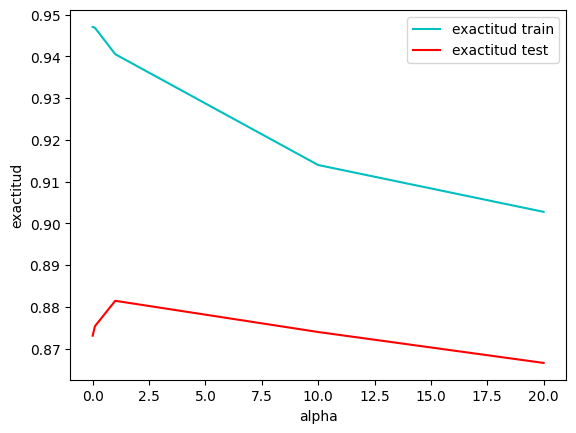

In [152]:
alphas=[0.0001,0.001,0.01,0.1,1,10,20]

score_train=[]
score_test=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha).fit(x_train,y_train)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

    score_train.append(ridge.score(x_train,y_train))
    score_test.append(ridge.score(x_test,y_test))

plt.plot(alphas,score_train,'c',label='exactitud train')
plt.plot(alphas,score_test,'r',label='exactitud test')


plt.legend()
plt.xlabel('alpha')
plt.ylabel('exactitud')


En la grafica anterior se puede observar que entre más pequeño es alpha, el score del modelo con los datos de entrenamiento es próximo a 95%, es un sobreajuste en el modelo es importante. A medida que alpha aumenta de valor, el sobreajuste tiene una disminución importante.
Para el modelo se elige un alpha=10,

In [153]:
ridge=Ridge(alpha=10).fit(x_train,y_train)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

print("el score del modelo con datos de entrenamiento: \n {}".format(ridge.score(x_train,y_train))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el score del modelo con datos de prueba: \n {}".format(ridge.score(x_test,y_test))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el numero de caracteristicas con coeficiente diferente de cero: \n {}".format(np.sum(ridge.coef_!=0)))

el score del modelo con datos de entrenamiento: 
 0.9139816012199634
el score del modelo con datos de prueba: 
 0.8739643979880205
el numero de caracteristicas con coeficiente diferente de cero: 
 26


El score con los datos de entrenamiento y de prueba dan como resultado un porcentaje de score muy bueno, además de que todas las caracteristicas del modelo tienen coeficentes diferentes de cero.

##MODELO LINEAL LASSO

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.645e-02, tolerance: 1.222e-02



Text(0, 0.5, 'exactitud')

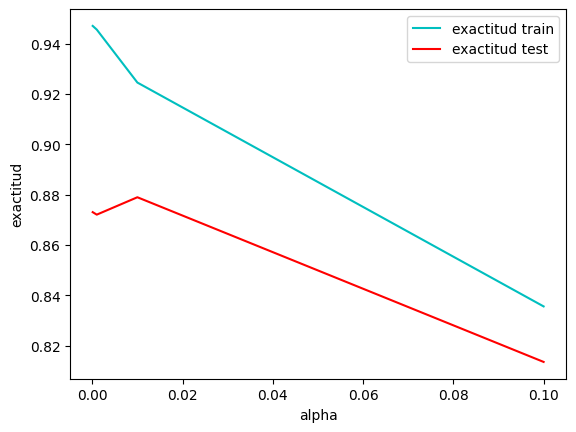

In [154]:
alphas=[0.0001,0.001,0.01,0.1]

score_train=[]
score_test=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha).fit(x_train,y_train)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

    score_train.append(lasso.score(x_train,y_train))
    score_test.append(lasso.score(x_test,y_test))

plt.plot(alphas,score_train,'c',label='exactitud train')
plt.plot(alphas,score_test,'r',label='exactitud test')


plt.legend()
plt.xlabel('alpha')
plt.ylabel('exactitud')


En la grafica anterior se puede observa que a medida que alpha es pequeño el sobreajuste es importante, pero si alpha aumenta de valor el score tiende ir hacia cero. El mejor alpha está más o menos en el valor de 0.01.

In [155]:
lasso=Lasso(alpha=0.01,max_iter=100000).fit(x_train,y_train)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

print("el score de entranamiento es \n {}".format(lasso.score(x_train,y_train))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el score de prueba es \n {}".format(lasso.score(x_test,y_test))) # se calcula el score con el nuevo conjunto de datos de prueba
print(np.sum(lasso.coef_!=0))

el score de entranamiento es 
 0.9245469841648737
el score de prueba es 
 0.8789624020662214
15


Un alfha más bajo nos permite ajustar un modelo más complejo qué funciona mejor con los datos de entrenamiento y prueba. El rendimiento es ligeramente mejor usando lasso que Ridge. En el modelo de lasso se tiene 15 caracteristicas con coeficientes diferente de 0, mientras que con modelo Ridge todas las caracteristicas tienen coeficiente diferente de 0.

##BINNING Y CARACTERISTICAS DE INTERACCIÓN

In [156]:
x_train_copy=x_train.copy()

x_train_copy=x_train_copy.drop(['DISENO','PLANTA'], axis=1)
x_train_copy

Gramaje  Temp Horno 1  Temp Horno 2  Temp Horno 3  Temp Horno 4  \
111 -0.742881      0.558493      0.558493      0.558493      0.459315   
154  1.788330      0.993158      0.993158      0.993158     -1.483973   
19  -0.742881     -0.310836     -0.310836     -0.310836      0.534057   
132  1.788330      1.427823      1.427823      1.427823     -1.708199   
74  -0.742881     -0.310836     -0.310836     -0.310836     -0.063878   
..        ...           ...           ...           ...           ...   
9   -0.742881      0.123829      0.123829      0.123829      0.833024   
103 -0.742881     -0.165948     -0.165948     -0.165948      0.608798   
67   1.788330      1.717599      1.717599      1.717599      0.907766   
117 -0.742881      0.558493      0.558493      0.558493      0.534057   
47  -0.236639      0.703382      0.703382      0.703382      0.758282   

     Temp Horno 5  Temp Horno 6  Vel Vent Horno 1  Vel Vent Horno 2  \
111      0.468676     -0.541759          0.619891          0.619891   
154     -1.349646     -0.541759         -0.676416         -0.676416   
19       0.555263     -0.925227          0.619891          0.619891   
132     -1.609406     -0.925227         -0.028263         -0.028263   
74       0.122329     -0.541759          0.619891          0.619891   
..            ...           ...               ...               ...   
9        0.815023     -0.158292          0.619891          0.619891   
103      0.555263      0.225176          0.295814          0.295814   
67       1.074783      2.909448         -2.944955         -2.944955   
117      0.555263     -0.541759          0.619891          0.619891   
47       0.728436     -0.158292          0.943968          0.943968   

     Vel Vent Horno 3  ...  PESO IMPREGNADO LO1  PESO IMPREGNADO LC  \
111          0.619891  ...            -0.619236           -0.590553   
154         -0.676416  ...             1.482461            1.441248   
19           0.619891  ...            -0.832311           -0.873714   
132         -0.028263  ...             1.777861            1.679699   
74           0.619891  ...            -0.948534           -0.848875   
..                ...  ...                  ...                 ...   
9            0.619891  ...            -0.406161           -0.426618   
103          0.295814  ...            -1.026016           -0.933327   
67          -2.944955  ...             1.729434            1.938021   
117          0.619891  ...            -0.657977           -0.635263   
47           0.943968  ...            -0.052649           -0.098748   

     PESO IMPREGNADO LT1  VOLATILES LO2  VOLATILES LC2  VOLATILES LT2  \
111            -0.808927      -0.540439      -0.159119      -0.441201   
154             1.532595      -0.727472       0.431567       0.378308   
19             -0.828940      -1.662637      -0.946701      -1.588513   
132             1.597637       0.207694      -0.749805      -1.424612   
74             -1.044080      -1.101538       0.037776      -0.932906   
..                   ...            ...            ...            ...   
9              -0.563768       0.207694      -0.159119      -0.769004   
103            -0.853956       0.581760       1.612940       0.870014   
67              1.737728      -1.101538      -1.143596      -1.096808   
117            -0.528745      -0.540439      -0.356014      -0.113397   
47             -0.253566      -0.914505      -0.946701      -1.424612   

      FLUIDEZ  ESTADO B LO3  ESTADO B LC3  ESTADO B LT3  
111  1.109147     -0.569225     -1.191679     -0.901402  
154 -0.628918      0.500974      0.709626      0.305709  
19  -0.628918     -0.194104      0.434544      0.038649  
132 -1.704863     -1.352567     -0.576789     -0.666389  
74   0.281497     -0.756786      0.102827     -0.271140  
..        ...           ...           ...           ...  
9   -0.215093     -0.260301      0.127099      0.465945  
103 -0.546153     -0.326499     -0.350250     -0.586271  
67  -1.870393      0.964

In [159]:
# se hallan los maximo y minimos para la creación del bins
print(x_train_copy.max().max())
print(x_train_copy.min().max())

4.4433174408611285
-1.1916486580200927


In [160]:
bins=np.linspace(4.44,-1.2,11) # se crean 10 bins entre 1 y 0.

In [161]:
which_bin=np.digitize(x_train,bins=bins) #Crea las caracteristicas discretas con el conjunto de datos de entrenamiento.
print(which_bin.shape)


(129, 26)


In [162]:
# se codifica la caracteristica discretas creadas anteriormente.
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(which_bin)
x_train_binned=encoder.transform(which_bin)
print(x_train_binned.shape)

(129, 165)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [163]:
x_test_binned=encoder.transform(np.digitize(x_test,bins=bins))  #Crea las caracteristicas discretas con el conjunto de datos de prueba y se condifica.

In [164]:
x_train_combined=np.hstack([x_train,x_train_binned]) # creación de las caracteristicas de interacción para el conjunto de entrenamiento
print(x_train_combined.shape)

(129, 191)


In [165]:
x_test_combined=np.hstack([x_test,x_test_binned])  # creación de las caracteristicas de interacción para el conjunto de prueba
print(x_test_combined.shape)

(43, 191)


Text(0, 0.5, 'exactitud')

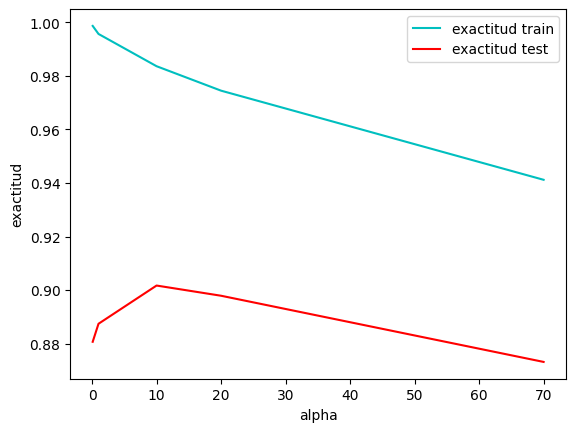

In [175]:
alphas=[0.1,1,10,20,70]

score_train=[]
score_test=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha).fit(x_train_combined,y_train)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

    score_train.append(ridge.score(x_train_combined,y_train))
    score_test.append(ridge.score(x_test_combined,y_test))

plt.plot(alphas,score_train,'c',label='exactitud train')
plt.plot(alphas,score_test,'r',label='exactitud test')


plt.legend()
plt.xlabel('alpha')
plt.ylabel('exactitud')

In [176]:
ridge=Ridge(alpha=30).fit(x_train_combined,y_train)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

print("el score del modelo con datos de entrenamiento: \n {}".format(ridge.score(x_train_combined,y_train))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el score del modelo con datos de prueba: \n {}".format(ridge.score(x_test_combined,y_test))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el numero de caracteristicas con coeficiente diferente de cero: \n {}".format(np.sum(ridge.coef_!=0)))

el score del modelo con datos de entrenamiento: 
 0.9666133828924282
el score del modelo con datos de prueba: 
 0.8928128224339696
el numero de caracteristicas con coeficiente diferente de cero: 
 191


Usando Binning y caracteristicas de interacción el modelo mejoró 0.02 puntos con respecto a Lasso, pero el sobreajuste aumento. Además de que las caracteristicas diferente de cero es igual 191, esto hace un modelo dificil de entender.

## Modelamiento para el Target GAP LT(mm)

**CONJUNTO DE DATOS DE ENTRENAMIENTO Y PRUEBA**

In [89]:
x_train1, x_test1,y_train1, y_test1=train_test_split(data,target2,random_state=0)  # se crea el conjunto de datos de entrenamiento y prueba.

## Modelo de RIDGE

Text(0, 0.5, 'exactitud')

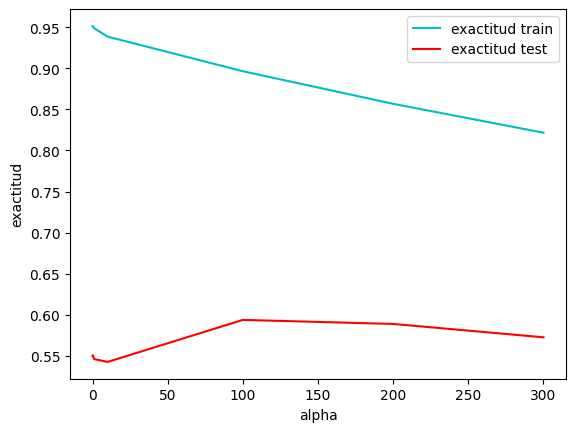

In [122]:
alphas=[0.0001,0.001,0.01,0.1,1,10,100,200,300]

score_train1=[]
score_test1=[]
for alpha in alphas:
    ridge2=Ridge(alpha=alpha).fit(x_train1,y_train1)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

    score_train1.append(ridge2.score(x_train1,y_train1))
    score_test1.append(ridge2.score(x_test1,y_test1))

plt.plot(alphas,score_train1,'c',label='exactitud train')
plt.plot(alphas,score_test1,'r',label='exactitud test')


plt.legend()
plt.xlabel('alpha')
plt.ylabel('exactitud')


En la grafica anterior se puede observar que entre más pequeño es alpha, el score del modelo con los datos de entrenamiento es próximo a 90%, es un sobreajuste en el modelo es importante. A medida que alpha aumenta de valor, el sobreajuste tiene una disminución importante.
Para el modelo se elige un alpha=100,

In [124]:
ridge=Ridge(alpha=100).fit(x_train1,y_train1)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

print("el score del modelo con datos de entrenamiento: \n {}".format(ridge.score(x_train1,y_train1))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el score del modelo con datos de prueba: \n {}".format(ridge.score(x_test1,y_test1))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el numero de caracteristicas con coeficiente diferente de cero: \n {}".format(np.sum(ridge.coef_!=0)))

el score del modelo con datos de entrenamiento: 
 0.8963771534898914
el score del modelo con datos de prueba: 
 0.5938863340362464
el numero de caracteristicas con coeficiente diferente de cero: 
 26


El score con los datos de entrenamiento y de prueba dan como resultado un porcentaje de score del 0.59, además de que todas las caracteristicas del modelo tienen coeficentes diferentes de cero.

##Modelo de LASSO

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.796e-02, tolerance: 1.366e-02



Text(0, 0.5, 'exactitud')

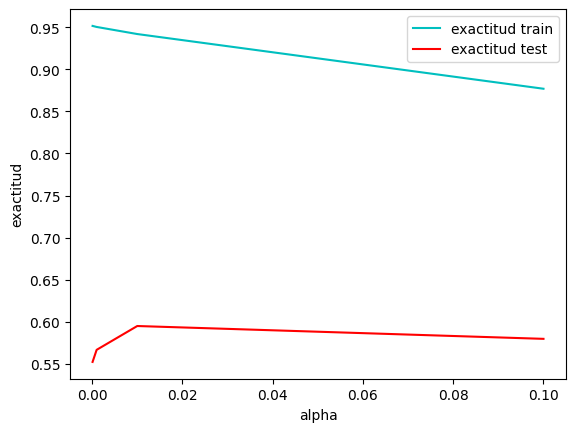

In [100]:
alphas=[0.0001,0.001,0.01,0.1]

score_train1=[]
score_test1=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha).fit(x_train1,y_train1)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

    score_train1.append(lasso.score(x_train1,y_train1))
    score_test1.append(lasso.score(x_test1,y_test1))

plt.plot(alphas,score_train1,'c',label='exactitud train')
plt.plot(alphas,score_test1,'r',label='exactitud test')


plt.legend()
plt.xlabel('alpha')
plt.ylabel('exactitud')


En la grafica anterior se puede observa que a medida que alpha es pequeño el sobreajuste es importante, pero si alpha aumenta de valor el score tiende ir hacia cero. El mejor alpha está más o menos en el valor de 0.01.

In [177]:
lasso=Lasso(alpha=0.01,max_iter=100000).fit(x_train1,y_train1)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

print("el score de entranamiento es \n {}".format(lasso.score(x_train1,y_train1))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el score de prueba es \n {}".format(lasso.score(x_test1,y_test1))) # se calcula el score con el nuevo conjunto de datos de prueba
print(np.sum(lasso.coef_!=0))

el score de entranamiento es 
 0.9418546958861419
el score de prueba es 
 0.5949805377928844
13


Los dos modelos dan como resultados muy similares. Se observa que el alpha de lasso es mucho menor al alpha de ridge. También, el score de los dos modelos para el target GAP LT(mm) es mucho menor que para el target GAP LO(mm). Tal vez se necesite realizar una mayor recolección de datos para obtener mejores resultados en el target2.

##BINNING Y CARACTERISTICAS DE INTERACCIÓN

In [179]:
x_train_copy1=x_train1.copy()

x_train_copy1=x_train_copy1.drop(['DISENO','PLANTA'], axis=1)
x_train_copy1

Gramaje  Temp Horno 1  Temp Horno 2  Temp Horno 3  Temp Horno 4  \
111 -0.742881      0.558493      0.558493      0.558493      0.459315   
154  1.788330      0.993158      0.993158      0.993158     -1.483973   
19  -0.742881     -0.310836     -0.310836     -0.310836      0.534057   
132  1.788330      1.427823      1.427823      1.427823     -1.708199   
74  -0.742881     -0.310836     -0.310836     -0.310836     -0.063878   
..        ...           ...           ...           ...           ...   
9   -0.742881      0.123829      0.123829      0.123829      0.833024   
103 -0.742881     -0.165948     -0.165948     -0.165948      0.608798   
67   1.788330      1.717599      1.717599      1.717599      0.907766   
117 -0.742881      0.558493      0.558493      0.558493      0.534057   
47  -0.236639      0.703382      0.703382      0.703382      0.758282   

     Temp Horno 5  Temp Horno 6  Vel Vent Horno 1  Vel Vent Horno 2  \
111      0.468676     -0.541759          0.619891          0.619891   
154     -1.349646     -0.541759         -0.676416         -0.676416   
19       0.555263     -0.925227          0.619891          0.619891   
132     -1.609406     -0.925227         -0.028263         -0.028263   
74       0.122329     -0.541759          0.619891          0.619891   
..            ...           ...               ...               ...   
9        0.815023     -0.158292          0.619891          0.619891   
103      0.555263      0.225176          0.295814          0.295814   
67       1.074783      2.909448         -2.944955         -2.944955   
117      0.555263     -0.541759          0.619891          0.619891   
47       0.728436     -0.158292          0.943968          0.943968   

     Vel Vent Horno 3  ...  PESO IMPREGNADO LO1  PESO IMPREGNADO LC  \
111          0.619891  ...            -0.619236           -0.590553   
154         -0.676416  ...             1.482461            1.441248   
19           0.619891  ...            -0.832311           -0.873714   
132         -0.028263  ...             1.777861            1.679699   
74           0.619891  ...            -0.948534           -0.848875   
..                ...  ...                  ...                 ...   
9            0.619891  ...            -0.406161           -0.426618   
103          0.295814  ...            -1.026016           -0.933327   
67          -2.944955  ...             1.729434            1.938021   
117          0.619891  ...            -0.657977           -0.635263   
47           0.943968  ...            -0.052649           -0.098748   

     PESO IMPREGNADO LT1  VOLATILES LO2  VOLATILES LC2  VOLATILES LT2  \
111            -0.808927      -0.540439      -0.159119      -0.441201   
154             1.532595      -0.727472       0.431567       0.378308   
19             -0.828940      -1.662637      -0.946701      -1.588513   
132             1.597637       0.207694      -0.749805      -1.424612   
74             -1.044080      -1.101538       0.037776      -0.932906   
..                   ...            ...            ...            ...   
9              -0.563768       0.207694      -0.159119      -0.769004   
103            -0.853956       0.581760       1.612940       0.870014   
67              1.737728      -1.101538      -1.143596      -1.096808   
117            -0.528745      -0.540439      -0.356014      -0.113397   
47             -0.253566      -0.914505      -0.946701      -1.424612   

      FLUIDEZ  ESTADO B LO3  ESTADO B LC3  ESTADO B LT3  
111  1.109147     -0.569225     -1.191679     -0.901402  
154 -0.628918      0.500974      0.709626      0.305709  
19  -0.628918     -0.194104      0.434544      0.038649  
132 -1.704863     -1.352567     -0.576789     -0.666389  
74   0.281497     -0.756786      0.102827     -0.271140  
..        ...           ...           ...           ...  
9   -0.215093     -0.260301      0.127099      0.465945  
103 -0.546153     -0.326499     -0.350250     -0.586271  
67  -1.870393      0.964

In [180]:
# se hallan los maximo y minimos para la creación del bins
print(x_train_copy1.max().max())
print(x_train_copy1.min().max())

4.4433174408611285
-1.1916486580200927


In [181]:
bins=np.linspace(4.44,-1.2,11) # se crean 10 bins entre 1 y 0.

In [182]:
which_bin=np.digitize(x_train1,bins=bins) #Crea las caracteristicas discretas con el conjunto de datos de entrenamiento.
print(which_bin.shape)


(129, 26)


In [183]:
# se codifica la caracteristica discretas creadas anteriormente.
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(which_bin)
x_train_binned=encoder.transform(which_bin)
print(x_train_binned.shape)

(129, 165)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [184]:
x_test_binned=encoder.transform(np.digitize(x_test1,bins=bins))  #Crea las caracteristicas discretas con el conjunto de datos de prueba y se condifica.

In [185]:
x_train_combined=np.hstack([x_train1,x_train_binned]) # creación de las caracteristicas de interacción para el conjunto de entrenamiento
print(x_train_combined.shape)

(129, 191)


In [186]:
x_test_combined=np.hstack([x_test1,x_test_binned])  # creación de las caracteristicas de interacción para el conjunto de prueba
print(x_test_combined.shape)

(43, 191)


Text(0, 0.5, 'exactitud')

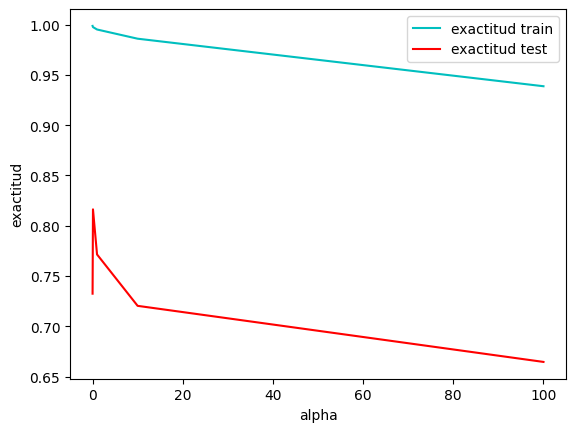

In [190]:
alphas=[0.01,0.1,1,10,100]

score_train=[]
score_test=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha).fit(x_train_combined,y_train1)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

    score_train.append(ridge.score(x_train_combined,y_train1))
    score_test.append(ridge.score(x_test_combined,y_test1))

plt.plot(alphas,score_train,'c',label='exactitud train')
plt.plot(alphas,score_test,'r',label='exactitud test')


plt.legend()
plt.xlabel('alpha')
plt.ylabel('exactitud')

In [195]:
ridge=Ridge(alpha=100).fit(x_train_combined,y_train1)  #se realiza el ajuste del algoritmo de regresión lineal con el nuevo conjunto de datos de entrenamiento

print("el score del modelo con datos de entrenamiento: \n {}".format(ridge.score(x_train_combined,y_train1))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el score del modelo con datos de prueba: \n {}".format(ridge.score(x_test_combined,y_test1))) # se calcula el score con el nuevo conjunto de datos de prueba
print("el numero de caracteristicas con coeficiente diferente de cero: \n {}".format(np.sum(ridge.coef_!=0)))

el score del modelo con datos de entrenamiento: 
 0.9387669120871163
el score del modelo con datos de prueba: 
 0.6646205593548518
el numero de caracteristicas con coeficiente diferente de cero: 
 191


Usando Binning y caracteristicas de interacción el modelo mejoró notablemente con respecto a Lasso y Ridge, pero el sobreajuste aumento ligeramente. Además, las caracteristicas diferente de cero es igual 191, esto hacer un modelo dificil de entender.